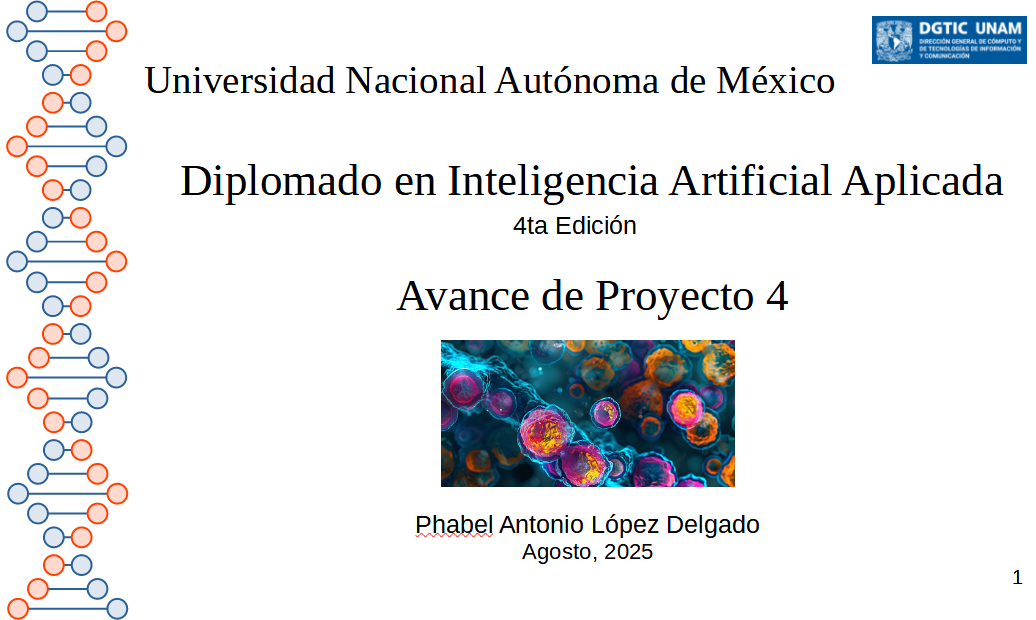

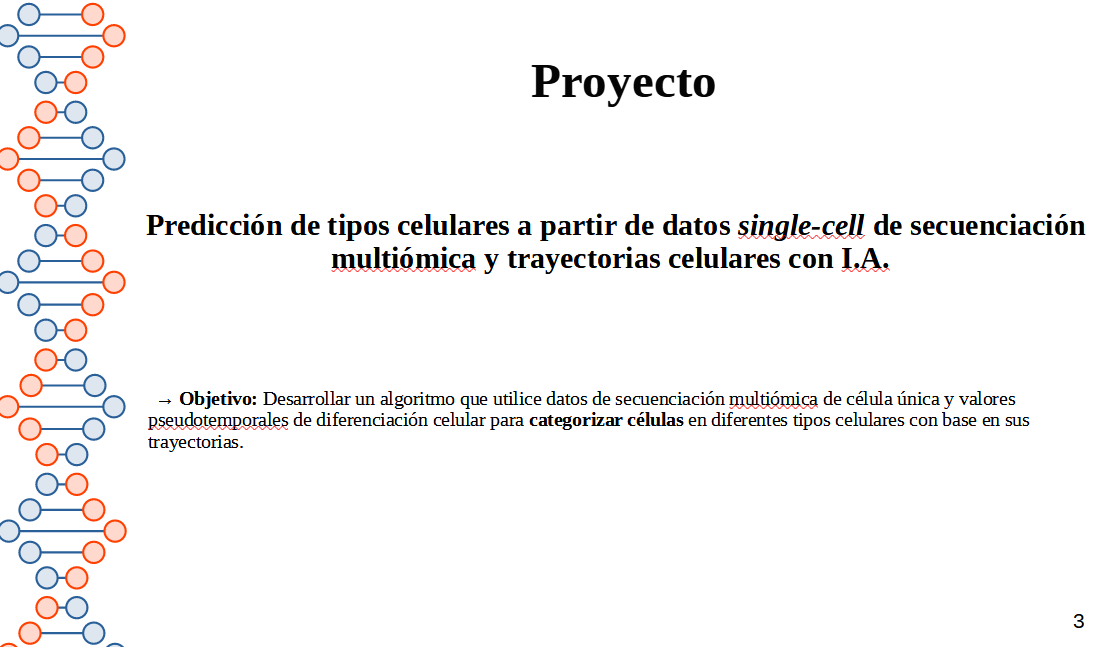

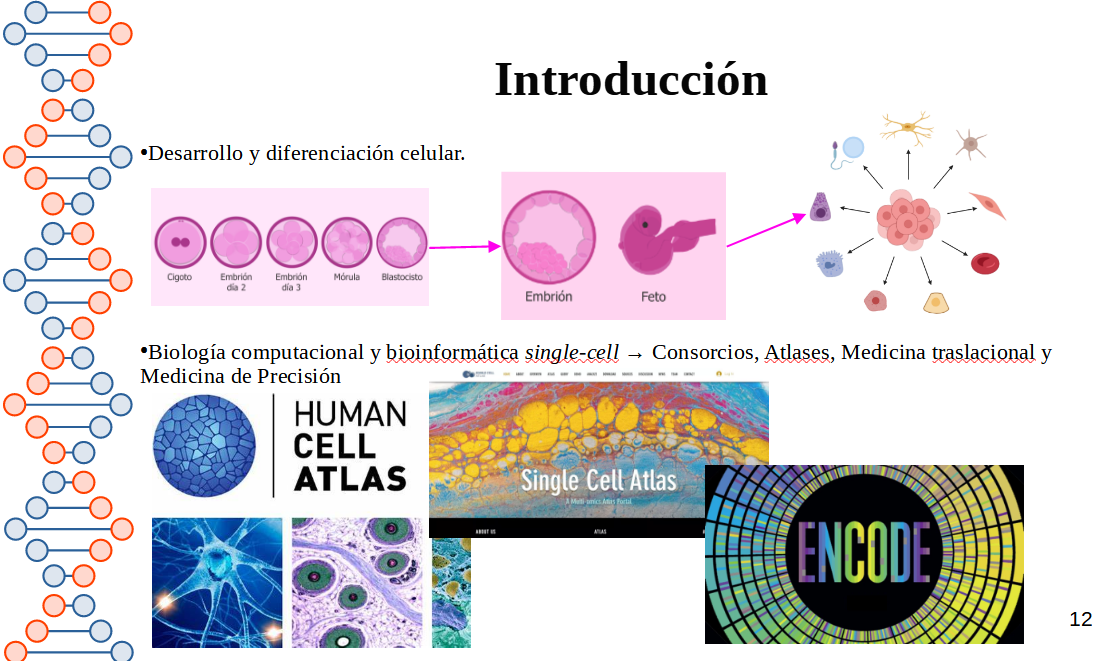

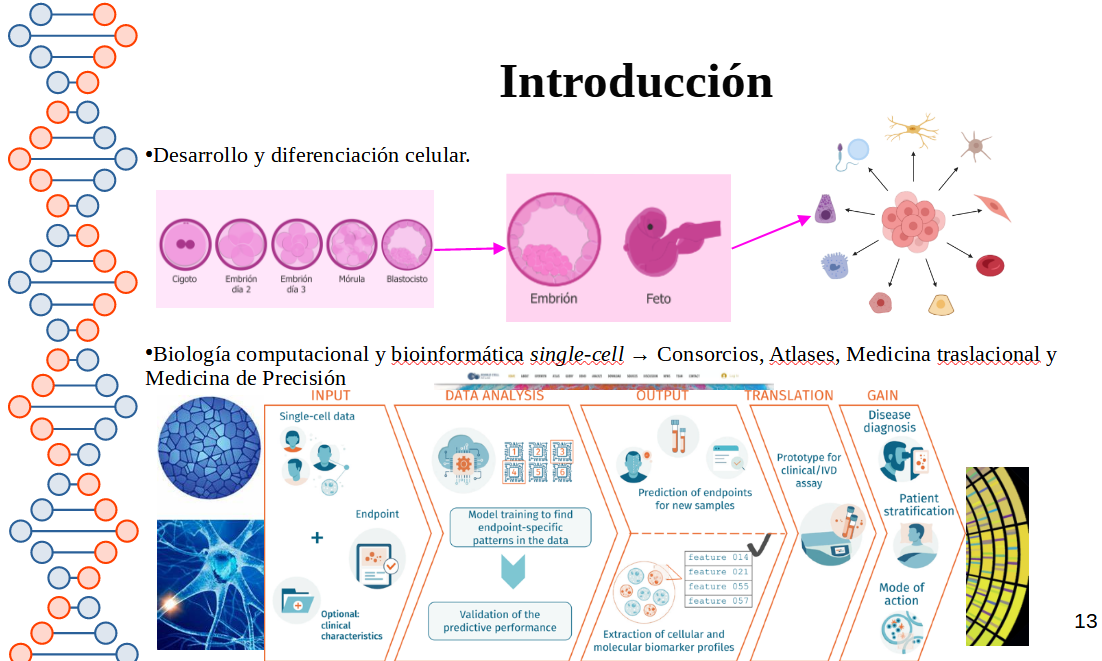

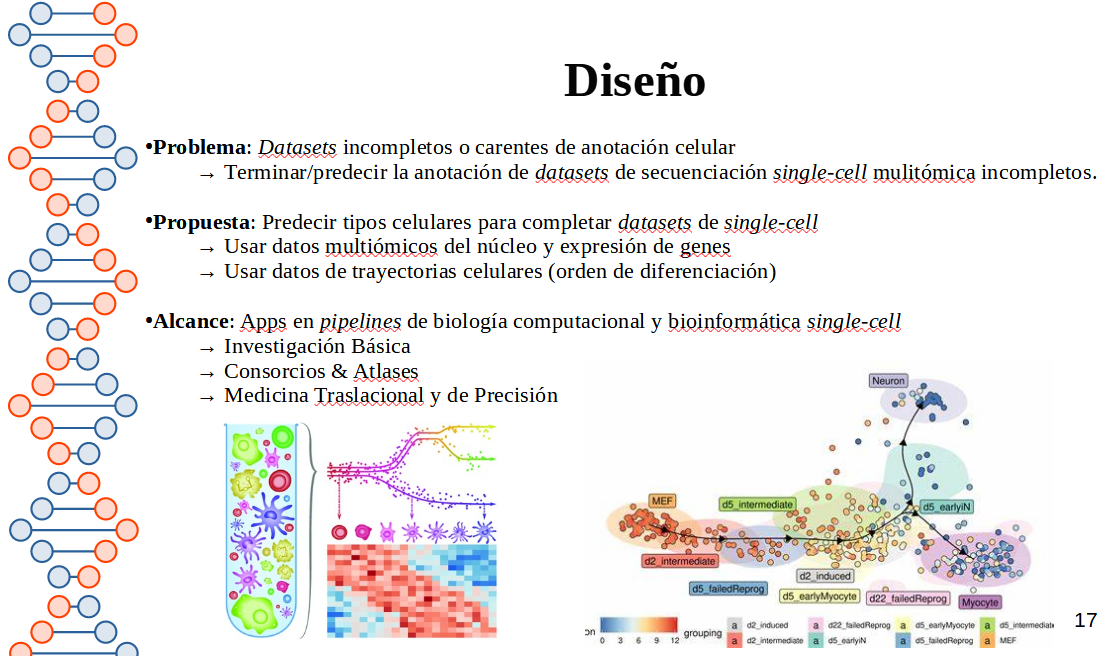

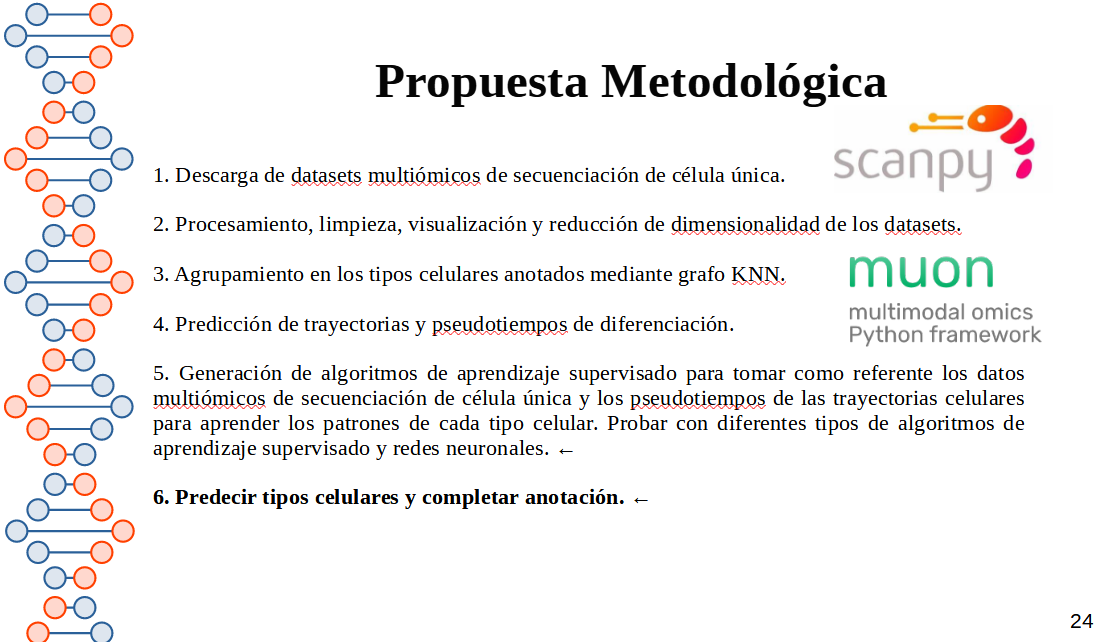

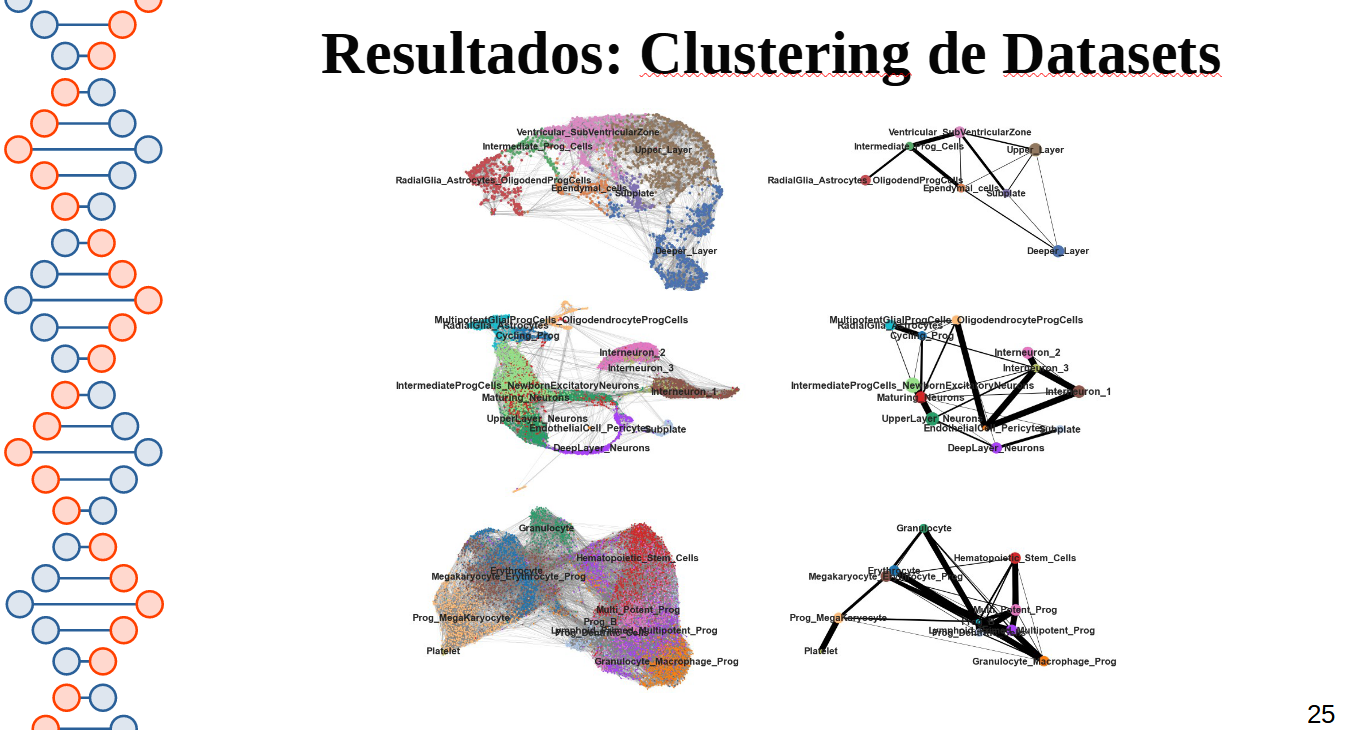

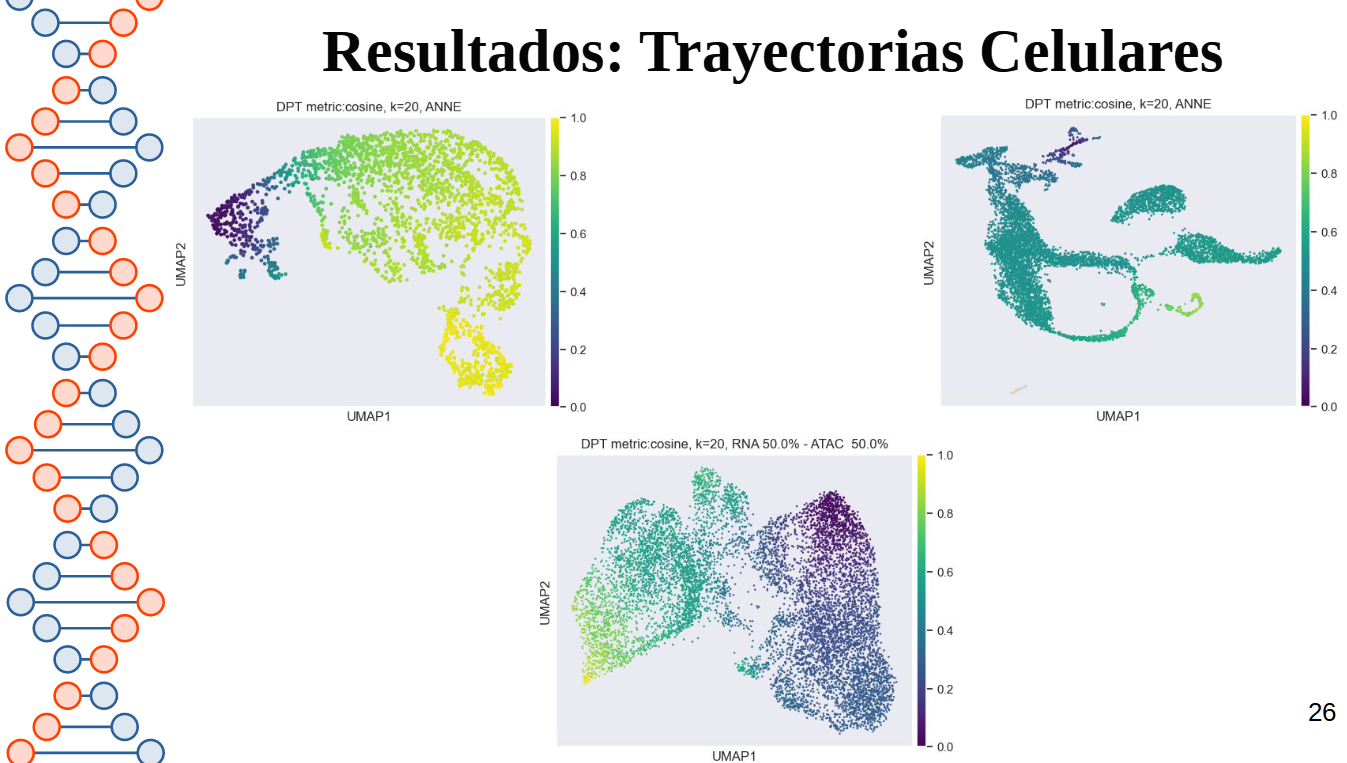

## Downloads

In [ ]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 3.4 MB/s eta 0:00:00


In [ ]:
!pip install muon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.7/293.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
# Super Tree Install
!pip install supertree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.5/321.5 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.2 MB/s eta 0:00:00
  Created wheel for supertree: filename=supertree-0.5.5-py3-none-any.whl size=223914 sha256=866aef7f2c14e4309ee4146d92e758c6e684a36ab3399380717c62f194847dad
  Stored in directory: /root/.cache/pip/wheels/94/d5/5f/2e4b444abd02194d56fa70a3ad54a41c856f5a680a23882100
Successfully built supertree


# Dataset 1: Mouse Brain

## Part I: Create Working Dataset

In [ ]:
# Usually required libraries
import numpy as np
import pandas as pd

# Muon
import muon as mu
from muon import atac as ac

# ScanPy
import scanpy as sc

In [ ]:
# Read ATAC modality
adata_atac = sc.read("/content/drive/MyDrive/GraduateCourseAI/PROJECT/DATASETS/MouseBrain_Peak_Def.h5ad")
# Read RNA modality
adata_rna = sc.read("/content/drive/MyDrive/GraduateCourseAI/PROJECT/DATASETS/MouseBrain_GEX_Def.h5ad")

# Order Indexes
adata_atac = adata_atac[adata_atac.obs_names.sort_values()]
adata_rna = adata_rna[adata_rna.obs_names.sort_values()]

# Get common Cells
intersect_cells_indxs = set(adata_rna.obs_names.intersection(adata_atac.obs_names))

# Sort RNA AnnData
cells_indxs_rna = [indx in intersect_cells_indxs for indx in adata_rna.obs_names]
adata_rna = adata_rna[cells_indxs_rna]
adata_rna.obs.sort_index(inplace=True)

# Sort ATAC AnnData
cells_indxs_atac = [indx in intersect_cells_indxs for indx in adata_atac.obs_names]
adata_atac = adata_atac[cells_indxs_atac]
adata_atac.obs.sort_index(inplace=True)

# Join both Modalities to forge MuData Object
mdata = mu.MuData({'rna': adata_rna, 'atac': adata_atac})
# Unique variables
mdata.var_names_make_unique()
# Check
mdata

/usr/local/lib/python3.12/dist-packages/anndata/_core/anndata.py:1793: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.12/dist-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/usr/local/lib/python3.12/dist-packages/mudata/_core/mudata.py:947: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_opt

MuData object with n_obs × n_vars = 2620 × 41985
  var:	'n_cells', 'log_n_cells', 'passes_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
  2 modalities
    rna:	2620 x 5592
      obs:	'CellType', 'n_features', 'log_n_features', 'n_counts', 'log_n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'passes_filter', 'leiden', 'target'
      var:	'gene_ids', 'feature_types', 'genome', 'n_cells', 'log_n_cells', 'MT', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'passes_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
      uns:	'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
      obsm:	'X_TopoAE', 'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'MAGIC'
      obsp:	'TopoAE_kNN', 'connectivities', 'distances'
    atac:	2620 x 36393
      obs:	'CellType', 'n_features', 'log_n_features', 'n_counts', 'log_n_counts', 'passes_filter', 'leiden', 'target'
      var:	'chr', 'start', 'stop', 'n_cells', 'log_n_cells', 'passes_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
      uns:	'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
      obsm:	'X_TopoAE', 'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'MAGIC'
      obsp:	'TopoAE_kNN', 'connectivities', 'distances'

In [ ]:
# Update CellTypes (pandas.core.series.Series)
mdata['rna'].obs.CellType = mdata['rna'].obs.CellType.replace({'IPC': 'Intermediate_Prog_Cells', 'RG_Astro_OPC': 'RadialGlia_Astrocytes_OligodendProgCells', 'V_SVZ': 'Ventricular_SubVentricularZone' })
mdata['atac'].obs.CellType = mdata['atac'].obs.CellType.replace({'IPC': 'Intermediate_Prog_Cells', 'RG_Astro_OPC': 'RadialGlia_Astrocytes_OligodendProgCells', 'V_SVZ': 'Ventricular_SubVentricularZone' })

/tmp/ipython-input-963242998.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  mdata['rna'].obs.CellType = mdata['rna'].obs.CellType.replace({'IPC': 'Intermediate_Prog_Cells', 'RG_Astro_OPC': 'RadialGlia_Astrocytes_OligodendProgCells', 'V_SVZ': 'Ventricular_SubVentricularZone' })
/tmp/ipython-input-963242998.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  mdata['atac'].obs.CellType = mdata['atac'].obs.CellType.replace({'IPC': 'Intermediate_Prog_Cells', 'RG_Astro_OPC': 'RadialGlia_Astrocytes_OligodendProgCells', 'V_SVZ': 'Ventricular_SubVentricularZone' })


In [ ]:
# Read DPTs dataset
dpts = pd.read_csv("/content/drive/MyDrive/GraduateCourseAI/PROJECT/DATASETS/dpts_MouseBrain.csv", index_col=0)
dpts

dpt_RNA_100  dpt_ANNE_union  dpt_ANNE_p_union  \
AAACAGCCAACCGCCA-1     0.807820        0.858623          0.852480   
AAACAGCCAAGGTCGA-1     0.192235        0.132842          0.123911   
AAACAGCCAGGAACAT-1     0.848138        0.872178          0.884696   
AAACAGCCATATTGAC-1     0.954604        0.965098          0.958637   
AAACAGCCATGGTTAT-1     0.812061        0.858163          0.868288   
...                         ...             ...               ...   
TTTGTCTAGTTGCCTC-1     0.829323        0.876527          0.874146   
TTTGTGAAGCTGGAAA-1     0.852283        0.915861          0.915461   
TTTGTGGCATTTGCTC-1     0.823629        0.882768          0.877580   
TTTGTTGGTGGAGCAA-1     0.842039        0.874583          0.879429   
TTTGTTGGTTAGAGCC-1     0.840830        0.907649          0.905530   

                    dpt_ANNE_inter  dpt_ATAC_100   dpt_WNN   dpt_SNF  \
AAACAGCCAACCGCCA-1        0.726239      0.954083  0.940615  0.075696   
AAACAGCCAAGGTCGA-1        0.041411      0.231262  0.080452  0.044980   
AAACAGCCAGGAACAT-1        0.856864      0.956710  0.943173  0.059881   
AAACAGCCATATTGAC-1        0.951573      0.972601  0.984776  0.084801   
AAACAGCCATGGTTAT-1        0.722114      0.927248  0.897404  0.086884   
...                            ...           ...       ...       ...   
TTTGTCTAGTTGCCTC-1        0.767196      0.947686  0.945834  0.082109   
TTTGTGAAGCTGGAAA-1        0.826189      0.949689  0.911253  0.037370   
TTTGTGGCATTTGCTC-1        0.734183      0.966341  0.965006  0.031595   
TTTGTTGGTGGAGCAA-1        0.795142      0.944230  0.922321  0.026344   
TTTGTTGGTTAGAGCC-1        0.867490      0.959269  0.925738  0.048637   

                                                    CellType  
AAACAGCCAACCGCCA-1                               Upper_Layer  
AAACAGCCAAGGTCGA-1  RadialGlia_Astrocytes_OligodendProgCells  
AAACAGCCAGGAACAT-1                              Deeper_Layer  
AAACAGCCATATTGAC-1                              Deeper_Layer  
AAACAGCCATGGTTAT-1                                  Subplate  
...                                                      ...  
TTTGTCTAGTTGCCTC-1                               Upper_Layer  
TTTGTGAAGCTGGAAA-1                               Upper_Layer  
TTTGTGGCATTTGCTC-1                               Upper_Layer  
TTTGTTGGTGGAGCAA-1                              Deeper_Layer  
TTTGTTGGTTAGAGCC-1                               Upper_Layer  

[2620 rows x 8 columns]

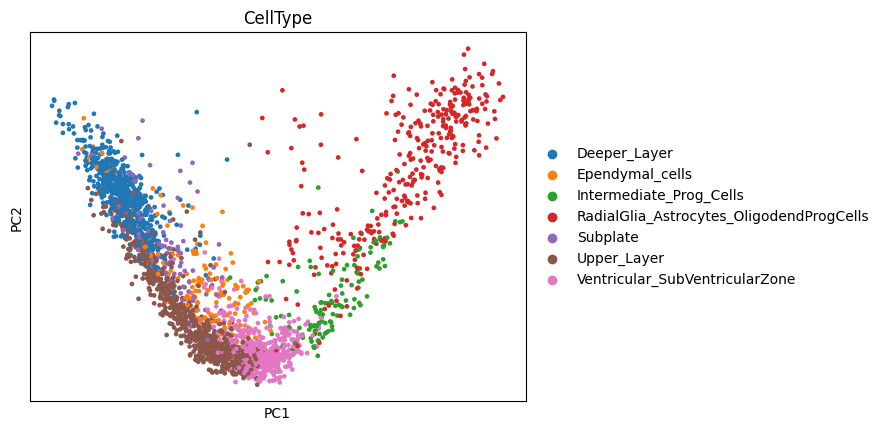

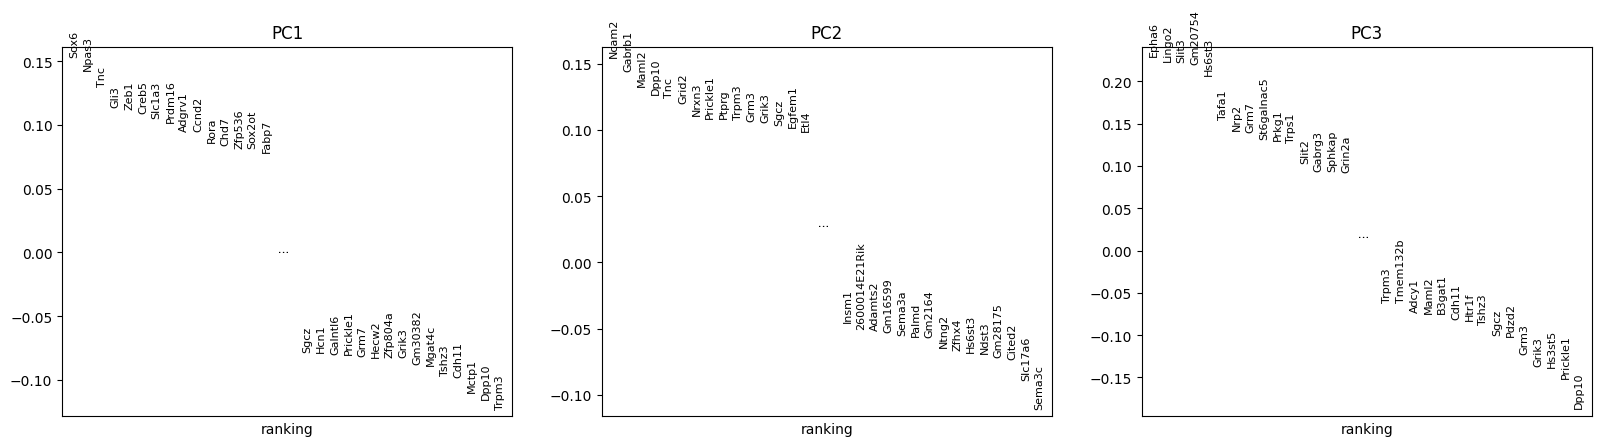

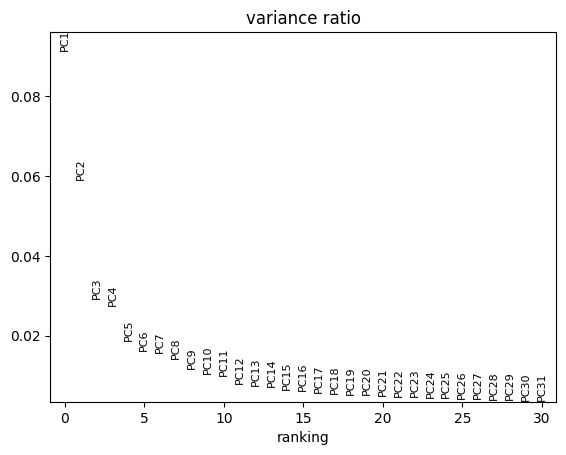

In [ ]:
# Principal Component Analysis for RNA
sc.pp.pca(mdata['rna'], n_comps=100)
sc.pl.pca_overview(mdata['rna'], color="CellType")

In [ ]:
# RNA PCA -> dense
RNA_X = pd.DataFrame(mdata['rna'].obsm['X_pca'], index = dpts.index, columns=[f"PC_{i+1}" for i in range(mdata['rna'].obsm['X_pca'].shape[1])]).iloc[:,0:50]
# Just keep a subset for trials
RNA_X

PC_1      PC_2      PC_3      PC_4      PC_5  \
AAACAGCCAACCGCCA-1   0.300863 -3.748919 -0.730358  0.049078  0.137280   
AAACAGCCAAGGTCGA-1  10.427103  8.137574  1.750159  0.952852 -6.224934   
AAACAGCCAGGAACAT-1  -4.903167  6.043913  4.014242 -1.356090  0.259209   
AAACAGCCATATTGAC-1  -4.233589  3.028039 -4.796859 -1.872229 -0.523535   
AAACAGCCATGGTTAT-1  -0.034471 -1.123850  2.838558 -0.981763  0.863829   
...                       ...       ...       ...       ...       ...   
TTTGTCTAGTTGCCTC-1  -0.887583 -2.820499  0.201609  2.565927  0.063030   
TTTGTGAAGCTGGAAA-1  -3.066590  0.412174  2.937770  2.847692  0.290505   
TTTGTGGCATTTGCTC-1  -0.826612 -3.360620  0.027142  2.651402 -0.317009   
TTTGTTGGTGGAGCAA-1  -5.666776  4.646389  5.146743 -4.077773  0.517012   
TTTGTTGGTTAGAGCC-1  -3.370283 -0.915751 -0.246184  7.247978 -1.289818   

                        PC_6      PC_7      PC_8      PC_9     PC_10  ...  \
AAACAGCCAACCGCCA-1 -2.087500 -0.626512 -0.953106 -0.112151 -0.335740  ...   
AAACAGCCAAGGTCGA-1 -1.014424  0.570008 -1.753296  0.534987 -0.438294  ...   
AAACAGCCAGGAACAT-1  1.010589  0.708695  3.388803  0.107748  2.601873  ...   
AAACAGCCATATTGAC-1 -0.584491 -2.291337  1.193025 -2.353074 -0.755338  ...   
AAACAGCCATGGTTAT-1 -0.900337  2.027207  1.537359 -3.099604 -0.599976  ...   
...                      ...       ...       ...       ...       ...  ...   
TTTGTCTAGTTGCCTC-1 -0.270856 -0.658923 -1.897526 -0.778573  1.864294  ...   
TTTGTGAAGCTGGAAA-1 -0.442903 -0.181791  3.236573  1.547367 -1.410451  ...   
TTTGTGGCATTTGCTC-1 -2.211470 -2.073392 -0.550417  0.759180 -1.088375  ...   
TTTGTTGGTGGAGCAA-1 -0.236790  1.095563 -1.913321  2.036600  1.952711  ...   
TTTGTTGGTTAGAGCC-1  1.772125 -0.996560  1.136665  1.155889 -2.178280  ...   

                       PC_41     PC_42     PC_43     PC_44     PC_45  \
AAACAGCCAACCGCCA-1 -0.413104 -0.658601 -0.206197  0.474676  0.077282   
AAACAGCCAAGGTCGA-1  0.735464 -2.072851  0.218086  0.004481  0.569402   
AAACAGCCAGGAACAT-1  0.888775 -0.228810 -0.080980 -0.868144  1.224725   
AAACAGCCATATTGAC-1 -0.163534 -1.098009  0.479987  0.867605 -0.262323   
AAACAGCCATGGTTAT-1  0.782874  1.751895  0.860060  0.425614  0.429663   
...                      ...       ...       ...       ...       ...   
TTTGTCTAGTTGCCTC-1 -0.059011 -0.289371  0.280827 -0.493411  0.349509   
TTTGTGAAGCTGGAAA-1 -0.667124 -0.777627 -2.041209  0.277551  1.978419   
TTTGTGGCATTTGCTC-1 -0.444699  0.393267 -0.615357  0.456463  0.139240   
TTTGTTGGTGGAGCAA-1 -0.547950 -0.640712  0.592098  0.282018  1.243026   
TTTGTTGGTTAGAGCC-1 -0.919889 -0.472782  0.193303 -0.500730 -1.266297   

                       PC_46     PC_47     PC_48     PC_49     PC_50  
AAACAGCCAACCGCCA-1  0.621023 -0.372460 -0.361199  0.050172 -0.498745  
AAACAGCCAAGGTCGA-1 -0.580916 -0.238699 -0.760112 -0.696910 -0.003056  
AAACAGCCAGGAACAT-1 -0.028890  0.408507  1.972476  1.096301 -1.473652  
AAACAGCCATATTGAC-1 -0.285837 -0.573378  0.045350 -0.126582  0.654818  
AAACAGCCATGGTTAT-1 -1.299816  0.331668 -0.791569  0.287093 -0.811160  
...                      ...       ...       ...       ...       ...  
TTTGTCTAGTTGCCTC-1  0.190619  0.274351  0.599325 -0.378281 -0.477563  
TTTGTGAAGCTGGAAA-1 -0.481438  0.683840  0.673651 -0.495172 -0.776050  
TTTGTGGCATTTGCTC-1  1.006025  0.277263 -0.453294 -0.636366  0.817679  
TTTGTTGGTGGAGCAA-1  0.528440  1.016961  0.550607  0.898625 -1.260341  
TTTGTTGGTTAGAGCC-1  1.568426  1.411116  0.975256  0.614130  0.020994  

[2620 rows x 50 columns]

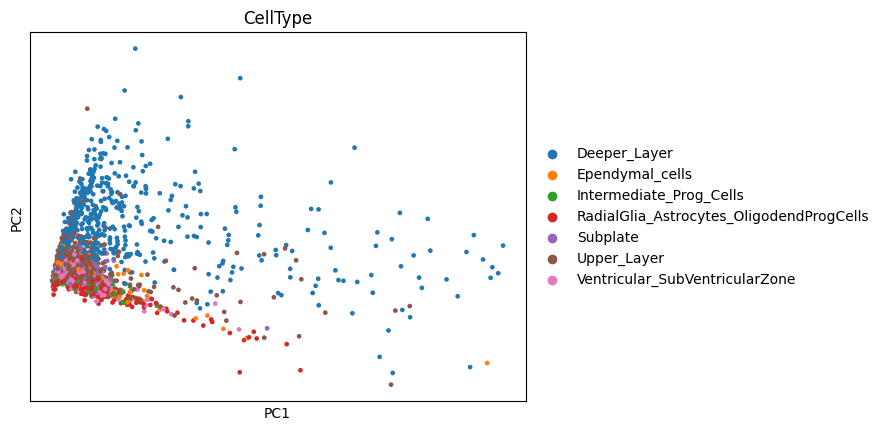

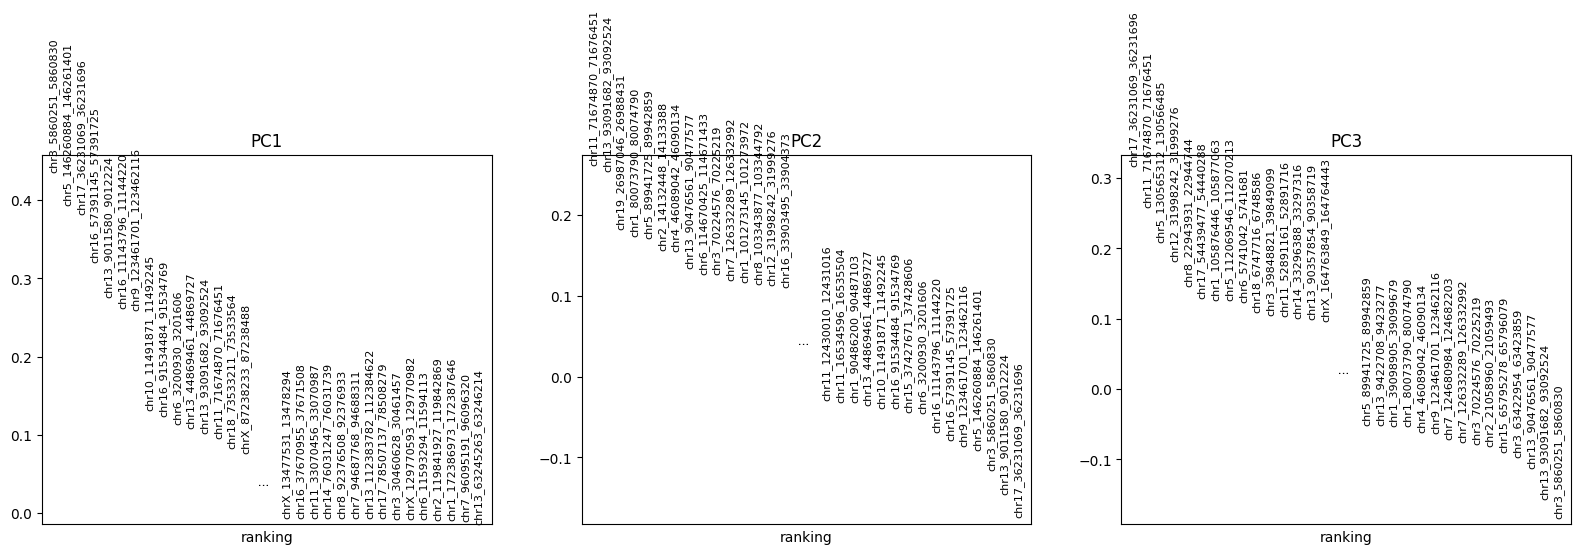

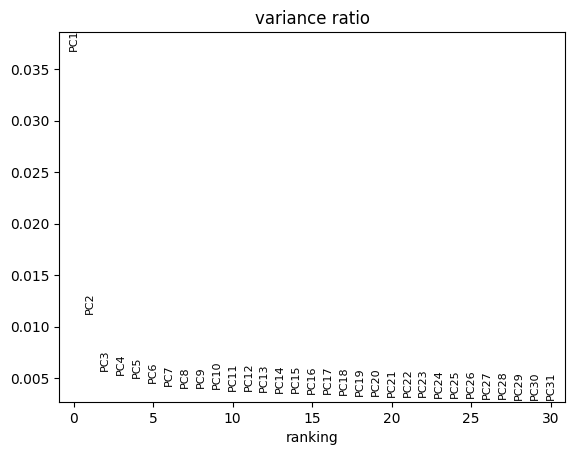

In [ ]:
# Principal Component Analysis for ATAC
sc.pp.pca(mdata['atac'], n_comps=100)
sc.pl.pca_overview(mdata['atac'], color="CellType")

In [ ]:
# ATAC PCA -> dense
ATAC_X = pd.DataFrame(mdata['atac'].obsm['X_pca'], index = dpts.index, columns=[f"PC_{i+1}" for i in range(mdata['atac'].obsm['X_pca'].shape[1])]).iloc[:,0:50]
# Just keep a subset for trials
ATAC_X

PC_1      PC_2      PC_3      PC_4      PC_5  \
AAACAGCCAACCGCCA-1 -0.014973 -0.193123 -0.073867 -0.215503 -0.006938   
AAACAGCCAAGGTCGA-1 -0.481390 -0.276843 -0.022214 -0.074826  0.092850   
AAACAGCCAGGAACAT-1  0.762060  0.165571  0.062823 -0.133423 -0.425741   
AAACAGCCATATTGAC-1  0.891394  1.081585 -0.365615 -0.276009 -0.013376   
AAACAGCCATGGTTAT-1  0.217705 -0.281626 -0.275760 -0.198795 -0.088674   
...                      ...       ...       ...       ...       ...   
TTTGTCTAGTTGCCTC-1 -0.469318 -0.094644  0.182801 -0.137506  0.049630   
TTTGTGAAGCTGGAAA-1  0.037118 -0.002865  0.063216 -0.249942 -0.149384   
TTTGTGGCATTTGCTC-1  0.458873  0.104379  0.587741 -1.037612  0.595311   
TTTGTTGGTGGAGCAA-1 -0.416407  0.081824 -0.245748  0.099923 -0.100336   
TTTGTTGGTTAGAGCC-1 -0.172794  0.219672  0.603654 -0.218214 -0.560785   

                        PC_6      PC_7      PC_8      PC_9     PC_10  ...  \
AAACAGCCAACCGCCA-1 -0.074530 -0.261176  0.043970  0.225262 -0.215466  ...   
AAACAGCCAAGGTCGA-1  0.204387 -0.233074  0.008234  0.143662 -0.076346  ...   
AAACAGCCAGGAACAT-1  0.381724 -0.076077  0.515908 -0.059065 -0.292046  ...   
AAACAGCCATATTGAC-1  0.310192 -0.176701  0.065106 -0.318271 -0.338730  ...   
AAACAGCCATGGTTAT-1  0.068507 -0.013900  0.433780 -0.325663 -0.243076  ...   
...                      ...       ...       ...       ...       ...  ...   
TTTGTCTAGTTGCCTC-1 -0.140778  0.021222  0.072543 -0.180968 -0.001221  ...   
TTTGTGAAGCTGGAAA-1 -0.423252 -0.382314  0.486439 -0.255033 -0.270026  ...   
TTTGTGGCATTTGCTC-1  0.011879  0.935632 -0.152017 -0.113274  0.688233  ...   
TTTGTTGGTGGAGCAA-1  0.070378 -0.127836 -0.021607 -0.141131  0.215016  ...   
TTTGTTGGTTAGAGCC-1 -0.446059  0.292037 -0.147089  0.264716 -0.399716  ...   

                       PC_41     PC_42     PC_43     PC_44     PC_45  \
AAACAGCCAACCGCCA-1  0.023990 -0.055644  0.022276 -0.029842  0.023831   
AAACAGCCAAGGTCGA-1  0.048464  0.074681 -0.084201  0.239565  0.200823   
AAACAGCCAGGAACAT-1 -0.179544 -0.011284  0.150269 -0.020189  0.017721   
AAACAGCCATATTGAC-1 -0.091371 -0.086710  0.239276  0.150788 -0.253396   
AAACAGCCATGGTTAT-1 -0.087973  0.069109  0.112246 -0.135862  0.015819   
...                      ...       ...       ...       ...       ...   
TTTGTCTAGTTGCCTC-1  0.042717  0.079694  0.096374 -0.089233  0.051322   
TTTGTGAAGCTGGAAA-1 -0.071884  0.109144 -0.072336  0.751242 -0.147420   
TTTGTGGCATTTGCTC-1  0.226899  0.474307  0.087897  0.153048  0.275440   
TTTGTTGGTGGAGCAA-1 -0.083313 -0.112950  0.186451 -0.025466 -0.464527   
TTTGTTGGTTAGAGCC-1 -0.067351 -0.025380  0.180092  0.078908 -0.057809   

                       PC_46     PC_47     PC_48     PC_49     PC_50  
AAACAGCCAACCGCCA-1  0.090668  0.175273  0.207681  0.044435 -0.170138  
AAACAGCCAAGGTCGA-1  0.082372  0.083819  0.135098  0.137216 -0.185728  
AAACAGCCAGGAACAT-1 -0.152265 -0.051451 -0.196326  0.158336  0.103236  
AAACAGCCATATTGAC-1  0.053298  0.083003  0.233211 -0.195577  0.151420  
AAACAGCCATGGTTAT-1  0.057597 -0.036715  0.063308  0.002219  0.129271  
...                      ...       ...       ...       ...       ...  
TTTGTCTAGTTGCCTC-1 -0.160929  0.131699 -0.055446 -0.037657 -0.220516  
TTTGTGAAGCTGGAAA-1  0.504367 -0.013372 -0.154400  0.105401 -0.105299  
TTTGTGGCATTTGCTC-1  0.019439  0.221865  0.048725 -0.180245  0.084391  
TTTGTTGGTGGAGCAA-1  0.452680 -0.193652  0.169619 -0.242370  0.290266  
TTTGTTGGTTAGAGCC-1  0.252340 -0.207731 -0.199355 -0.054457 -0.354061  

[2620 rows x 50 columns]

In [ ]:
# RNA count matrix -> dense
#RNA_X = pd.DataFrame(mdata['rna'].X.toarray(), index = dpts.index, columns=[f"Gene_{i+1}" for i in range(mdata['rna'].X.shape[1])])
# Just keep a subset for trials
#RNA_X = RNA_X.iloc[:, :1000]
#RNA_X

In [ ]:
# ATAC count matrix -> dense
#ATAC_X = pd.DataFrame(mdata['atac'].X.toarray(), index = dpts.index, columns=[f"Peak_{i+1}" for i in range(mdata['atac'].X.shape[1])])
# Just keep a subset for trials
#ATAC_X = ATAC_X.iloc[:, :1000]
#ATAC_X

In [ ]:
# Concatenate datasets -> Dense
Datasets_concat = pd.concat([RNA_X, ATAC_X, dpts], axis=1)
Datasets_concat = Datasets_concat[Datasets_concat["CellType"] != "Subplate"]
Datasets_concat

PC_1      PC_2      PC_3      PC_4      PC_5  \
AAACAGCCAACCGCCA-1   0.300863 -3.748919 -0.730358  0.049078  0.137280   
AAACAGCCAAGGTCGA-1  10.427103  8.137574  1.750159  0.952852 -6.224934   
AAACAGCCAGGAACAT-1  -4.903167  6.043913  4.014242 -1.356090  0.259209   
AAACAGCCATATTGAC-1  -4.233589  3.028039 -4.796859 -1.872229 -0.523535   
AAACATGCACTTACAG-1   0.663671 -4.689382 -0.223906  1.151412 -0.325859   
...                       ...       ...       ...       ...       ...   
TTTGTCTAGTTGCCTC-1  -0.887583 -2.820499  0.201609  2.565927  0.063030   
TTTGTGAAGCTGGAAA-1  -3.066590  0.412174  2.937770  2.847692  0.290505   
TTTGTGGCATTTGCTC-1  -0.826612 -3.360620  0.027142  2.651402 -0.317009   
TTTGTTGGTGGAGCAA-1  -5.666776  4.646389  5.146743 -4.077773  0.517012   
TTTGTTGGTTAGAGCC-1  -3.370283 -0.915751 -0.246184  7.247978 -1.289818   

                        PC_6      PC_7      PC_8      PC_9     PC_10  ...  \
AAACAGCCAACCGCCA-1 -2.087500 -0.626512 -0.953106 -0.112151 -0.335740  ...   
AAACAGCCAAGGTCGA-1 -1.014424  0.570008 -1.753296  0.534987 -0.438294  ...   
AAACAGCCAGGAACAT-1  1.010589  0.708695  3.388803  0.107748  2.601873  ...   
AAACAGCCATATTGAC-1 -0.584491 -2.291337  1.193025 -2.353074 -0.755338  ...   
AAACATGCACTTACAG-1 -2.108904 -0.384367 -1.044626 -0.712798 -0.051300  ...   
...                      ...       ...       ...       ...       ...  ...   
TTTGTCTAGTTGCCTC-1 -0.270856 -0.658923 -1.897526 -0.778573  1.864294  ...   
TTTGTGAAGCTGGAAA-1 -0.442903 -0.181791  3.236573  1.547367 -1.410451  ...   
TTTGTGGCATTTGCTC-1 -2.211470 -2.073392 -0.550417  0.759180 -1.088375  ...   
TTTGTTGGTGGAGCAA-1 -0.236790  1.095563 -1.913321  2.036600  1.952711  ...   
TTTGTTGGTTAGAGCC-1  1.772125 -0.996560  1.136665  1.155889 -2.178280  ...   

                       PC_49     PC_50  dpt_RNA_100  dpt_ANNE_union  \
AAACAGCCAACCGCCA-1  0.044435 -0.170138     0.807820        0.858623   
AAACAGCCAAGGTCGA-1  0.137216 -0.185728     0.192235        0.132842   
AAACAGCCAGGAACAT-1  0.158336  0.103236     0.848138        0.872178   
AAACAGCCATATTGAC-1 -0.195577  0.151420     0.954604        0.965098   
AAACATGCACTTACAG-1  0.182459  0.112398     0.809975        0.862843   
...                      ...       ...          ...             ...   
TTTGTCTAGTTGCCTC-1 -0.037657 -0.220516     0.829323        0.876527   
TTTGTGAAGCTGGAAA-1  0.105401 -0.105299     0.852283        0.915861   
TTTGTGGCATTTGCTC-1 -0.180245  0.084391     0.823629        0.882768   
TTTGTTGGTGGAGCAA-1 -0.242370  0.290266     0.842039        0.874583   
TTTGTTGGTTAGAGCC-1 -0.054457 -0.354061     0.840830        0.907649   

                    dpt_ANNE_p_union  dpt_ANNE_inter  dpt_ATAC_100   dpt_WNN  \
AAACAGCCAACCGCCA-1          0.852480        0.726239      0.954083  0.940615   
AAACAGCCAAGGTCGA-1          0.123911        0.041411      0.231262  0.080452   
AAACAGCCAGGAACAT-1          0.884696        0.856864      0.956710  0.943173   
AAACAGCCATATTGAC-1          0.958637        0.951573      0.972601  0.984776   
AAACATGCACTTACAG-1          0.856456        0.756735      0.948050  0.940169   
...                              ...             ...           ...       ...   
TTTGTCTAGTTGCCTC-1          0.874146        0.767196      0.947686  0.945834   
TTTGTGAAGCTGGAAA-1          0.915461        0.826189      0.949689  0.911253   
TTTGTGGCATTTGCTC-1          0.877580        0.734183      0.966341  0.965006   
TTTGTTGGTGGAGCAA-1          0.879429        0.795142      0.944230  0.922321   
TTTGTTGGTTAGAGCC-1          0.905530        0.867490      0.959269  0.925738   

                     dpt_SNF                                  CellType  
AAACAGCCAACCGCCA-1  0.075696                               Upper_Layer  
AAACAGCCAAGGTCGA-1  0.044980  RadialGlia_Astrocytes_OligodendProgCells  
AAACAGCCAGGAACAT-1  0.059881                              Deeper_Layer  
AAACAGCCATATTGAC-1  0.084801                              Deeper_Layer  
AAACATGCACTTACAG-1  0.026224                

## Part II: Split Data

In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Process Dataset

# Remove useless cols
Dataset = Datasets_concat.drop(['dpt_RNA_100', 'dpt_ANNE_union', 'dpt_ANNE_inter', 'dpt_ATAC_100', 'dpt_WNN', 'dpt_SNF'], axis=1)

# Remove Inf and NaN
Dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
Dataset.dropna(inplace=True)

# Vectorize Cell Type Labels
# CellType Mapper
CellType_mapper = {'Deeper_Layer':0,
 'Ependymal_cells':1,
 'Intermediate_Prog_Cells':2,
 'RadialGlia_Astrocytes_OligodendProgCells':3,
 #'Subplate':4,
 'Upper_Layer':4,
 'Ventricular_SubVentricularZone':5}
# Mapped CellTypes
Dataset_CellType_Labels = Dataset["CellType"]
Dataset["CellType"] = Dataset["CellType"].map(CellType_mapper)

# Check
Dataset

PC_1      PC_2      PC_3      PC_4      PC_5  \
AAACAGCCAACCGCCA-1   0.300863 -3.748919 -0.730358  0.049078  0.137280   
AAACAGCCAAGGTCGA-1  10.427103  8.137574  1.750159  0.952852 -6.224934   
AAACAGCCAGGAACAT-1  -4.903167  6.043913  4.014242 -1.356090  0.259209   
AAACAGCCATATTGAC-1  -4.233589  3.028039 -4.796859 -1.872229 -0.523535   
AAACATGCACTTACAG-1   0.663671 -4.689382 -0.223906  1.151412 -0.325859   
...                       ...       ...       ...       ...       ...   
TTTGTCTAGTTGCCTC-1  -0.887583 -2.820499  0.201609  2.565927  0.063030   
TTTGTGAAGCTGGAAA-1  -3.066590  0.412174  2.937770  2.847692  0.290505   
TTTGTGGCATTTGCTC-1  -0.826612 -3.360620  0.027142  2.651402 -0.317009   
TTTGTTGGTGGAGCAA-1  -5.666776  4.646389  5.146743 -4.077773  0.517012   
TTTGTTGGTTAGAGCC-1  -3.370283 -0.915751 -0.246184  7.247978 -1.289818   

                        PC_6      PC_7      PC_8      PC_9     PC_10  ...  \
AAACAGCCAACCGCCA-1 -2.087500 -0.626512 -0.953106 -0.112151 -0.335740  ...   
AAACAGCCAAGGTCGA-1 -1.014424  0.570008 -1.753296  0.534987 -0.438294  ...   
AAACAGCCAGGAACAT-1  1.010589  0.708695  3.388803  0.107748  2.601873  ...   
AAACAGCCATATTGAC-1 -0.584491 -2.291337  1.193025 -2.353074 -0.755338  ...   
AAACATGCACTTACAG-1 -2.108904 -0.384367 -1.044626 -0.712798 -0.051300  ...   
...                      ...       ...       ...       ...       ...  ...   
TTTGTCTAGTTGCCTC-1 -0.270856 -0.658923 -1.897526 -0.778573  1.864294  ...   
TTTGTGAAGCTGGAAA-1 -0.442903 -0.181791  3.236573  1.547367 -1.410451  ...   
TTTGTGGCATTTGCTC-1 -2.211470 -2.073392 -0.550417  0.759180 -1.088375  ...   
TTTGTTGGTGGAGCAA-1 -0.236790  1.095563 -1.913321  2.036600  1.952711  ...   
TTTGTTGGTTAGAGCC-1  1.772125 -0.996560  1.136665  1.155889 -2.178280  ...   

                       PC_43     PC_44     PC_45     PC_46     PC_47  \
AAACAGCCAACCGCCA-1  0.022276 -0.029842  0.023831  0.090668  0.175273   
AAACAGCCAAGGTCGA-1 -0.084201  0.239565  0.200823  0.082372  0.083819   
AAACAGCCAGGAACAT-1  0.150269 -0.020189  0.017721 -0.152265 -0.051451   
AAACAGCCATATTGAC-1  0.239276  0.150788 -0.253396  0.053298  0.083003   
AAACATGCACTTACAG-1  0.022371  0.031786  0.039743  0.082018 -0.075513   
...                      ...       ...       ...       ...       ...   
TTTGTCTAGTTGCCTC-1  0.096374 -0.089233  0.051322 -0.160929  0.131699   
TTTGTGAAGCTGGAAA-1 -0.072336  0.751242 -0.147420  0.504367 -0.013372   
TTTGTGGCATTTGCTC-1  0.087897  0.153048  0.275440  0.019439  0.221865   
TTTGTTGGTGGAGCAA-1  0.186451 -0.025466 -0.464527  0.452680 -0.193652   
TTTGTTGGTTAGAGCC-1  0.180092  0.078908 -0.057809  0.252340 -0.207731   

                       PC_48     PC_49     PC_50  dpt_ANNE_p_union  CellType  
AAACAGCCAACCGCCA-1  0.207681  0.044435 -0.170138          0.852480         4  
AAACAGCCAAGGTCGA-1  0.135098  0.137216 -0.185728          0.123911         3  
AAACAGCCAGGAACAT-1 -0.196326  0.158336  0.103236          0.884696         0  
AAACAGCCATATTGAC-1  0.233211 -0.195577  0.151420          0.958637         0  
AAACATGCACTTACAG-1  0.069015  0.182459  0.112398          0.856456         4  
...                      ...       ...       ...               ...       ...  
TTTGTCTAGTTGCCTC-1 -0.055446 -0.037657 -0.220516          0.874146         4  
TTTGTGAAGCTGGAAA-1 -0.154400  0.105401 -0.105299          0.915461         4  
TTTGTGGCATTTGCTC-1  0.048725 -0.180245  0.084391          0.877580         4  
TTTGTTGGTGGAGCAA-1  0.169619 -0.242370  0.290266          0.879429         0  
TTTGTTGGTTAGAGCC-1 -0.199355 -0.054457 -0.354061          0.905530         4  

[2491 rows x 102 columns]

In [ ]:
# Get Multi-class labesl
Y = Dataset["CellType"]
Y

AAACAGCCAACCGCCA-1    4
AAACAGCCAAGGTCGA-1    3
AAACAGCCAGGAACAT-1    0
AAACAGCCATATTGAC-1    0
AAACATGCACTTACAG-1    4
                     ..
TTTGTCTAGTTGCCTC-1    4
TTTGTGAAGCTGGAAA-1    4
TTTGTGGCATTTGCTC-1    4
TTTGTTGGTGGAGCAA-1    0
TTTGTTGGTTAGAGCC-1    4
Name: CellType, Length: 2491, dtype: int64

In [ ]:
# Get Training Data matrix
X = Dataset.drop("CellType", axis=1)
X

PC_1      PC_2      PC_3      PC_4      PC_5  \
AAACAGCCAACCGCCA-1   0.300863 -3.748919 -0.730358  0.049078  0.137280   
AAACAGCCAAGGTCGA-1  10.427103  8.137574  1.750159  0.952852 -6.224934   
AAACAGCCAGGAACAT-1  -4.903167  6.043913  4.014242 -1.356090  0.259209   
AAACAGCCATATTGAC-1  -4.233589  3.028039 -4.796859 -1.872229 -0.523535   
AAACATGCACTTACAG-1   0.663671 -4.689382 -0.223906  1.151412 -0.325859   
...                       ...       ...       ...       ...       ...   
TTTGTCTAGTTGCCTC-1  -0.887583 -2.820499  0.201609  2.565927  0.063030   
TTTGTGAAGCTGGAAA-1  -3.066590  0.412174  2.937770  2.847692  0.290505   
TTTGTGGCATTTGCTC-1  -0.826612 -3.360620  0.027142  2.651402 -0.317009   
TTTGTTGGTGGAGCAA-1  -5.666776  4.646389  5.146743 -4.077773  0.517012   
TTTGTTGGTTAGAGCC-1  -3.370283 -0.915751 -0.246184  7.247978 -1.289818   

                        PC_6      PC_7      PC_8      PC_9     PC_10  ...  \
AAACAGCCAACCGCCA-1 -2.087500 -0.626512 -0.953106 -0.112151 -0.335740  ...   
AAACAGCCAAGGTCGA-1 -1.014424  0.570008 -1.753296  0.534987 -0.438294  ...   
AAACAGCCAGGAACAT-1  1.010589  0.708695  3.388803  0.107748  2.601873  ...   
AAACAGCCATATTGAC-1 -0.584491 -2.291337  1.193025 -2.353074 -0.755338  ...   
AAACATGCACTTACAG-1 -2.108904 -0.384367 -1.044626 -0.712798 -0.051300  ...   
...                      ...       ...       ...       ...       ...  ...   
TTTGTCTAGTTGCCTC-1 -0.270856 -0.658923 -1.897526 -0.778573  1.864294  ...   
TTTGTGAAGCTGGAAA-1 -0.442903 -0.181791  3.236573  1.547367 -1.410451  ...   
TTTGTGGCATTTGCTC-1 -2.211470 -2.073392 -0.550417  0.759180 -1.088375  ...   
TTTGTTGGTGGAGCAA-1 -0.236790  1.095563 -1.913321  2.036600  1.952711  ...   
TTTGTTGGTTAGAGCC-1  1.772125 -0.996560  1.136665  1.155889 -2.178280  ...   

                       PC_42     PC_43     PC_44     PC_45     PC_46  \
AAACAGCCAACCGCCA-1 -0.055644  0.022276 -0.029842  0.023831  0.090668   
AAACAGCCAAGGTCGA-1  0.074681 -0.084201  0.239565  0.200823  0.082372   
AAACAGCCAGGAACAT-1 -0.011284  0.150269 -0.020189  0.017721 -0.152265   
AAACAGCCATATTGAC-1 -0.086710  0.239276  0.150788 -0.253396  0.053298   
AAACATGCACTTACAG-1  0.020283  0.022371  0.031786  0.039743  0.082018   
...                      ...       ...       ...       ...       ...   
TTTGTCTAGTTGCCTC-1  0.079694  0.096374 -0.089233  0.051322 -0.160929   
TTTGTGAAGCTGGAAA-1  0.109144 -0.072336  0.751242 -0.147420  0.504367   
TTTGTGGCATTTGCTC-1  0.474307  0.087897  0.153048  0.275440  0.019439   
TTTGTTGGTGGAGCAA-1 -0.112950  0.186451 -0.025466 -0.464527  0.452680   
TTTGTTGGTTAGAGCC-1 -0.025380  0.180092  0.078908 -0.057809  0.252340   

                       PC_47     PC_48     PC_49     PC_50  dpt_ANNE_p_union  
AAACAGCCAACCGCCA-1  0.175273  0.207681  0.044435 -0.170138          0.852480  
AAACAGCCAAGGTCGA-1  0.083819  0.135098  0.137216 -0.185728          0.123911  
AAACAGCCAGGAACAT-1 -0.051451 -0.196326  0.158336  0.103236          0.884696  
AAACAGCCATATTGAC-1  0.083003  0.233211 -0.195577  0.151420          0.958637  
AAACATGCACTTACAG-1 -0.075513  0.069015  0.182459  0.112398          0.856456  
...                      ...       ...       ...       ...               ...  
TTTGTCTAGTTGCCTC-1  0.131699 -0.055446 -0.037657 -0.220516          0.874146  
TTTGTGAAGCTGGAAA-1 -0.013372 -0.154400  0.105401 -0.105299          0.915461  
TTTGTGGCATTTGCTC-1  0.221865  0.048725 -0.180245  0.084391          0.877580  
TTTGTTGGTGGAGCAA-1 -0.193652  0.169619 -0.242370  0.290266          0.879429  
TTTGTTGGTTAGAGCC-1 -0.207731 -0.199355 -0.054457 -0.354061          0.905530  

[2491 rows x 101 columns]

In [ ]:
# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=8, stratify=Y)

In [ ]:
# Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Part III: Random Forest

In [ ]:
# Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
# Model
forest = RandomForestClassifier(n_estimators=100, max_samples=0.8, max_features=0.8)

# Fit
forest.fit(X_train, Y_train)

RandomForestClassifier(max_features=0.8, max_samples=0.8)

In [ ]:
# Predict
Y_pred = forest.predict(X_test)

# Report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       117
           1       0.93      0.93      0.93        30
           2       1.00      0.92      0.96        24
           3       1.00      1.00      1.00        64
           4       0.98      0.90      0.94       166
           5       0.87      0.97      0.92        98

    accuracy                           0.95       499
   macro avg       0.96      0.95      0.95       499
weighted avg       0.95      0.95      0.95       499



Overall ROC AUC score: 0.9963821153620961


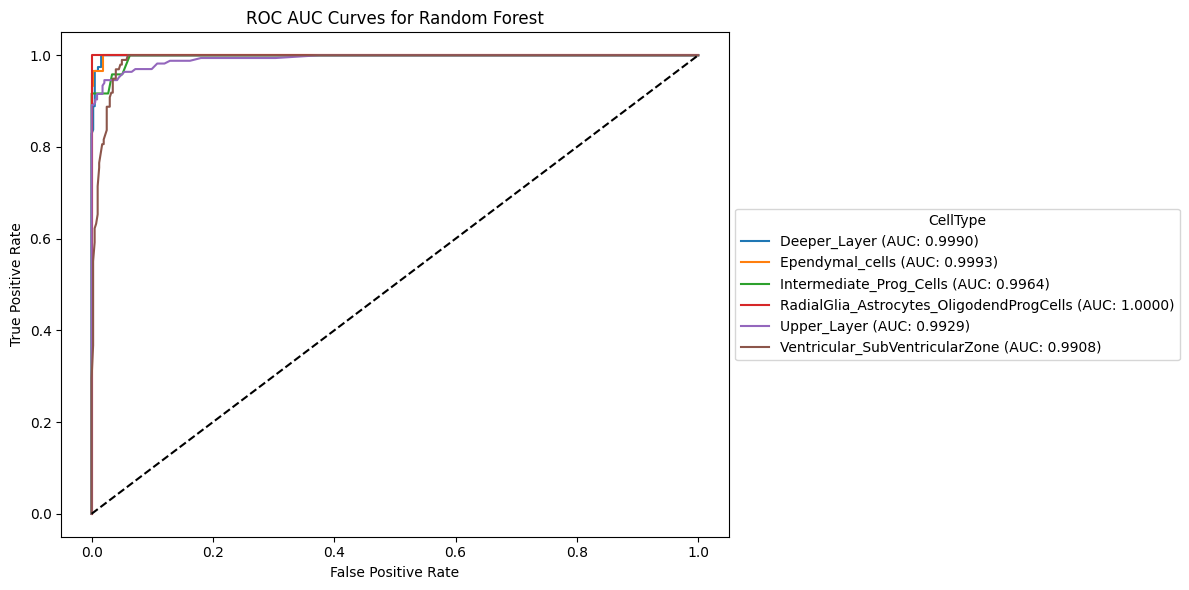

In [ ]:
# Step 1: Get predicted probabilities
predicted_probabilities = forest.predict_proba(X_test)  # shape (n_samples, n_classes)

# If Y_test is pandas Series, convert to numpy
true_classes = Y_test.to_numpy()


# Step 2: Compute overall multi-class ROC AUC
auc_score = roc_auc_score(true_classes, predicted_probabilities, multi_class='ovr')
print("Overall ROC AUC score:", auc_score)

# Step 3: Plot ROC curves for each class
labels = list(CellType_mapper.keys())

plt.figure(figsize=(12, 6))

for i in range(predicted_probabilities.shape[1]):
    # Compute ROC curve for class i
    fpr, tpr, _ = roc_curve(true_classes == i, predicted_probabilities[:, i])
    # Compute AUC for class i
    auc = roc_auc_score(true_classes == i, predicted_probabilities[:, i])
    plt.plot(fpr, tpr, label=f"{labels[i]} (AUC: {auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curves for Random Forest")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, ncol=1, title="CellType")
plt.tight_layout()
plt.show()

In [ ]:
# Super Tree
from supertree import SuperTree

# SuperTree Plot
super_tree = SuperTree(forest.estimators_[1], X_train, Y_train, X.columns.tolist(), list(map(str, Y.unique())))
super_tree.show_tree()

Output hidden; open in https://colab.research.google.com to view.

## Part IV: Hierarchical Clustering

In [ ]:
# Libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

### Divisive - Linkage

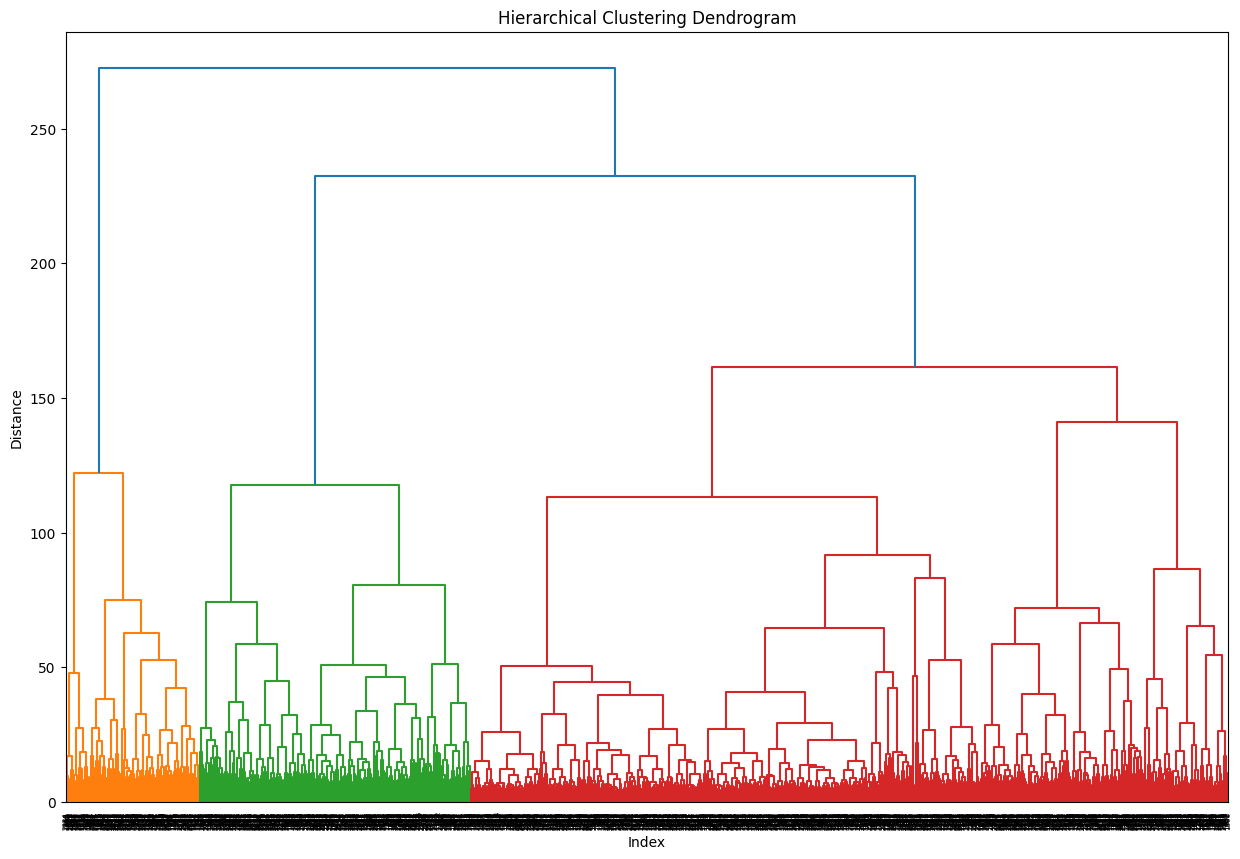

In [ ]:
# Model
Z = linkage(X, method='ward', metric="euclidean")

# Graficar el dendrograma
plt.figure(figsize=(15, 10))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

### Agglomerative

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
n_clusters = len(set(Y_train))
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,  linkage='ward')
labels = agg_clustering.fit_predict(X)

In [ ]:
# Create a DataFrame for better visualization
agglome_clust_df = pd.DataFrame({'Predicted': labels, 'CellType': Dataset_CellType_Labels})

# Create a cross-tabulation
contingency_table = pd.crosstab(agglome_clust_df['Predicted'], agglome_clust_df['CellType'])
contingency_table

CellType   Deeper_Layer  Ependymal_cells  Intermediate_Prog_Cells  \
Predicted                                                           
0                   544                1                        0   
1                     6               21                       91   
2                     0                0                        5   
3                    29              126                       26   
4                     5                0                        0   
5                     0                0                        0   

CellType   RadialGlia_Astrocytes_OligodendProgCells  Upper_Layer  \
Predicted                                                          
0                                                 3           33   
1                                                31          448   
2                                               231            0   
3                                                 0            1   
4                                                 0          347   
5                                                52            0   

CellType   Ventricular_SubVentricularZone  
Predicted                                  
0                                       0  
1                                     491  
2                                       0  
3                                       0  
4                                       0  
5                                       0

In [ ]:
contingency_table.idxmax(axis=0)

CellType
Deeper_Layer                                0
Ependymal_cells                             3
Intermediate_Prog_Cells                     1
RadialGlia_Astrocytes_OligodendProgCells    2
Upper_Layer                                 1
Ventricular_SubVentricularZone              1
dtype: int64

## Part V: Gradient Boosting Tree

In [ ]:
# Libraries
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
# Model
gbc = GradientBoostingClassifier(n_estimators=10)

# Fit
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=10)

In [ ]:
# Predict
Y_pred = gbc.predict(X_test)

# Report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       117
           1       0.92      0.80      0.86        30
           2       1.00      0.58      0.74        24
           3       0.97      1.00      0.98        64
           4       0.92      0.89      0.90       166
           5       0.81      0.94      0.87        98

    accuracy                           0.91       499
   macro avg       0.93      0.86      0.89       499
weighted avg       0.92      0.91      0.91       499



Overall ROC AUC score: 0.9947334233470816


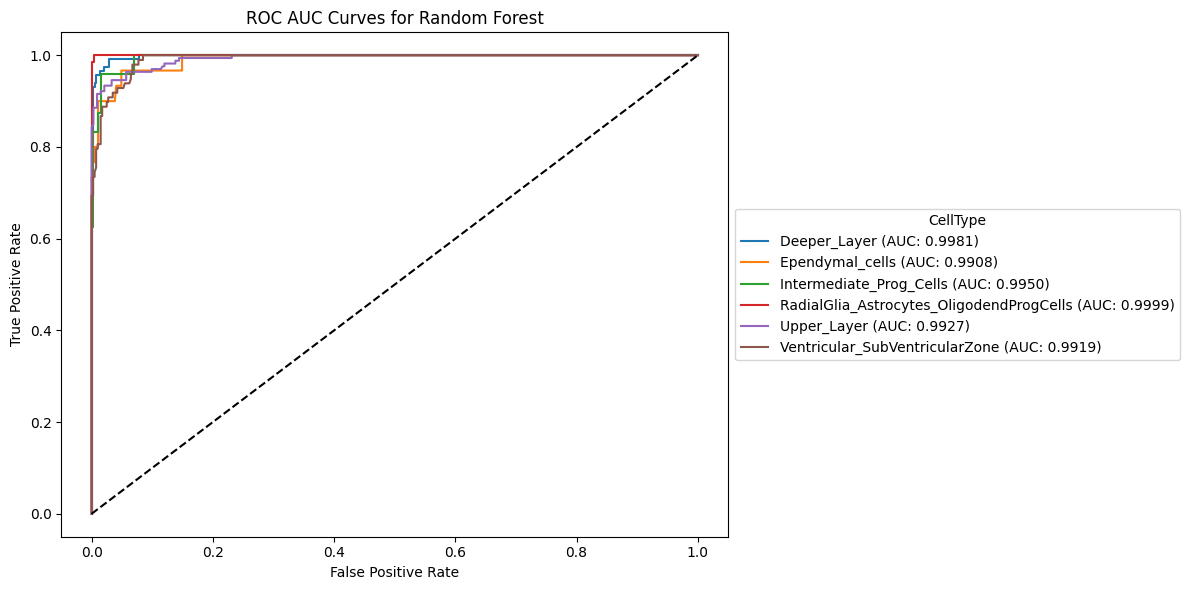

In [ ]:
# Step 1: Get predicted probabilities
predicted_probabilities = gbc.predict_proba(X_test)  # shape (n_samples, n_classes)

# If Y_test is pandas Series, convert to numpy
true_classes = Y_test.to_numpy()

# Step 2: Compute overall multi-class ROC AUC
auc_score = roc_auc_score(true_classes, predicted_probabilities, multi_class='ovr')
print("Overall ROC AUC score:", auc_score)

# Step 3: Plot ROC curves for each class
labels = list(CellType_mapper.keys())

plt.figure(figsize=(12, 6))

for i in range(predicted_probabilities.shape[1]):
    # Compute ROC curve for class i
    fpr, tpr, _ = roc_curve(true_classes == i, predicted_probabilities[:, i])
    # Compute AUC for class i
    auc = roc_auc_score(true_classes == i, predicted_probabilities[:, i])
    plt.plot(fpr, tpr, label=f"{labels[i]} (AUC: {auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curves for Random Forest")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, ncol=1, title="CellType")
plt.tight_layout()
plt.show()

In [ ]:
# Super Tree
from supertree import SuperTree

# SuperTree Plot
super_tree = SuperTree(gbc, X_train, Y_train, X.columns.tolist(), list(map(str, Y.unique())))
super_tree.show_tree()

Output hidden; open in https://colab.research.google.com to view.

## Part VI: Neural Networks

In [ ]:
# PyTorch Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
# Select device to run in
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Create tensors
# X tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float).to(device)

# Y tensors
Y_train_tensor = torch.tensor(Y_train, dtype=torch.int64).to(device)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.int64).to(device)

/tmp/ipython-input-2237013578.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_train_tensor = torch.tensor(Y_train, dtype=torch.int64).to(device)
/tmp/ipython-input-2237013578.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_test_tensor = torch.tensor(Y_test, dtype=torch.int64).to(device)


In [ ]:
# Simple Classifier Class
class SimpleClassifier(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.layer_1 = nn.Linear(in_features, 128)
        self.layer_2 = nn.Linear(128, 256)
        self.layer_3 = nn.Linear(256, 128)
        self.layer_4 = nn.Linear(128, 64)
        self.layer_5 = nn.Linear(64, 32)
        self.layer_6 = nn.Linear(32, out_features)

    def forward(self, x):
        x = self.layer_6(self.layer_5(self.layer_4(self.layer_3(self.layer_2(self.layer_1(x))))))
        return x

In [ ]:
# Define features and classes
in_features = X_train.shape[1]
num_classes = len(set(Y_train))

# Create classifier model object
model = SimpleClassifier(in_features, num_classes).to(device)

In [ ]:
# Optimization criteria
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Training
num_epochs = 250

for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor)

    _, predicted_labels = torch.max(outputs, 1)
    correct_predictions = (predicted_labels == Y_train_tensor).sum().item()

    total_samples = Y_train_tensor.size(0)
    accuracy = correct_predictions / total_samples

    # Accuracy
    #accuracy = accuracy_score(Y_train_tensor.cpu().numpy(), predicted_labels.cpu().numpy())

    # BackPropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")

Epoch [50/250], Loss: 0.0010, Accuracy: 1.0000
Epoch [100/250], Loss: 0.0000, Accuracy: 1.0000
Epoch [150/250], Loss: 0.0000, Accuracy: 1.0000
Epoch [200/250], Loss: 0.0000, Accuracy: 1.0000
Epoch [250/250], Loss: 0.0000, Accuracy: 1.0000


In [ ]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Model Evaluation
model.eval()
with torch.inference_mode():
    outputs = model(X_test_tensor)
    probabilities = F.softmax(outputs, dim=1)
    _, predicted_labels = torch.max(outputs, 1)

    accuracy = accuracy_score(Y_test, predicted_labels.numpy())
    f1 = f1_score(Y_test, predicted_labels.numpy(), average='weighted')
    precision = precision_score(Y_test, predicted_labels.numpy(), average='weighted')
    recall = recall_score(Y_test, predicted_labels.numpy(), average='weighted')
    predicted_tensor = predicted_labels.clone().detach()
    loss = criterion(outputs, predicted_tensor)

    print(f"Test Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

Test Loss: 0.0079, Accuracy: 0.9058, Precision: 0.9097, Recall: 0.9058, F1-score: 0.9060


In [ ]:
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score, roc_curve, auc

ROC AUC scores: 0.9898443950135295


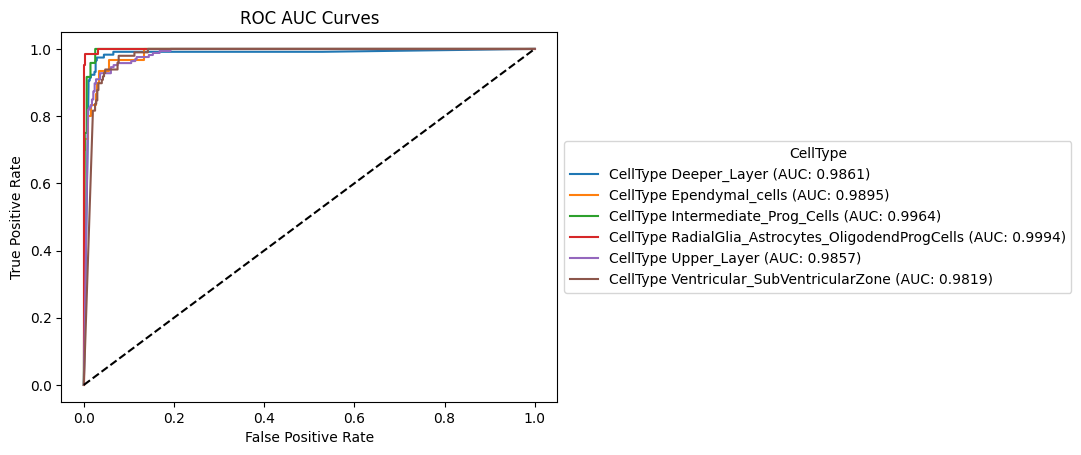

In [ ]:
true_classes = Y_test.to_numpy()  # Convert to numpy array
predicted_probabilities = probabilities.numpy()  # Convert to numpy array

auc_scores = roc_auc_score(true_classes, predicted_probabilities, multi_class='ovr')
print("ROC AUC scores:", auc_scores)

labels = list(CellType_mapper.keys())

# Plot ROC AUC curves for each class
for i in range(predicted_probabilities.shape[1]):
    fpr, tpr, _ = roc_curve(true_classes == i, predicted_probabilities[:, i])
    auc = roc_auc_score(Y_test == i, predicted_probabilities[:, i])
    plt.plot(fpr, tpr, label=f"CellType {labels[i]} (AUC: {auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curves")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, ncol=1, title="CellType")
plt.show()

In [ ]:
# Report
from sklearn.metrics import classification_report

print(classification_report(Y_test, predicted_labels.numpy()))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       117
           1       0.86      0.80      0.83        30
           2       0.88      0.88      0.88        24
           3       0.97      0.98      0.98        64
           4       0.95      0.86      0.91       166
           5       0.81      0.94      0.87        98

    accuracy                           0.91       499
   macro avg       0.90      0.90      0.90       499
weighted avg       0.91      0.91      0.91       499



# Dataset II: Human Brain

## Part I: Create working Dataset

In [ ]:
# Usually required libraries
import numpy as np
import pandas as pd

# Muon
import muon as mu
from muon import atac as ac

# ScanPy
import scanpy as sc

In [ ]:
# Read DPTs dataset
dpts = pd.read_csv("/content/drive/MyDrive/GraduateCourseAI/PROJECT/DATASETS/dpts_human_brain_2.csv", index_col=0)
dpts

dpt_RNA_100  dpt_ANNE_union  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA     0.469358        0.670321   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA     0.454846        0.530873   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA     0.385032        0.489068   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT     0.406164        0.515505   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC     0.400902        0.516121   
...                                            ...             ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAGTAGCCT     0.414356        0.526019   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG     0.394737        0.512184   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG     0.419685        0.535584   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA     0.437458        0.534223   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG     0.393080        0.500325   

                                       dpt_ANNE_p_union  dpt_ANNE_inter  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA          0.546886        0.045009   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA          0.436944        0.048108   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA          0.400453        0.030873   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT          0.423197        0.055813   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC          0.423380        0.071795   
...                                                 ...             ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAGTAGCCT          0.430542        0.031391   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG          0.419621        0.044300   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG          0.439416        0.079868   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA          0.440003        0.093368   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG          0.409668        0.049977   

                                       dpt_ATAC_100   dpt_WNN   dpt_SNF  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA      0.588829  0.695883  0.136518   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA      0.667742  0.714324  0.098683   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA      0.512175  0.534692  0.096023   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT      0.650411  0.679783  0.088241   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC      0.647541  0.651946  0.076495   
...                                             ...       ...       ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAGTAGCCT      0.542765  0.595517  0.096367   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG      0.663810  0.725367  0.094472   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG      0.670706  0.699633  0.080098   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA      0.640350  0.688677  0.162478   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG      0.534634  0.565138  0.086287   

                                                                             CellType  
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA                               DeepLayer_Neurons  
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA                                   Interneuron_1  
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA  IntermediateProgCells_NewbornExcitatoryNeurons  
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT                                   Interneuron_2  
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC                                   Interneuron_2  
...                                                                               ...  
hft_ctx_w21_dc2r2_r2_TTTGGTGCAGTAGCCT                                Maturing_Neurons  
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG                                   Interneuron_2  
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG                                   Interneuron_2  
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA                                   Interneuron_1  
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG  IntermediateProgCells_NewbornExcitatoryNeurons  

[7258 rows x 8 columns]

In [ ]:
# Read ATAC modality
#adata_atac = sc.read("/content/drive/MyDrive/GraduateCourseAI/DATASETS/humanbrain_adata_atac.h5ad")

In [ ]:
# Read RNA modality
adata_rna = sc.read("/content/drive/MyDrive/GraduateCourseAI/PROJECT/DATASETS/humanbrain_adata_rna.h5ad")

# Order Indexes
#adata_atac = adata_atac[adata_atac.obs_names.sort_values()]
adata_rna = adata_rna[adata_rna.obs_names.sort_values()]

# Get common Cells
intersect_cells_indxs = set(adata_rna.obs_names.intersection(dpts.index))

# Sort RNA AnnData
cells_indxs_rna = [indx in intersect_cells_indxs for indx in adata_rna.obs_names]
adata_rna = adata_rna[cells_indxs_rna]
adata_rna.obs.sort_index(inplace=True)

# Sort ATAC AnnData
#cells_indxs_atac = [indx in intersect_cells_indxs for indx in adata_atac.obs_names]
#adata_atac = adata_atac[cells_indxs_atac]
#adata_atac.obs.sort_index(inplace=True)

# Join both Modalities to forge MuData Object
mdata = mu.MuData({'rna': adata_rna})#, 'atac': adata_atac})
# Unique variables
mdata.var_names_make_unique()
# Check
mdata

/usr/local/lib/python3.11/dist-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/usr/local/lib/python3.11/dist-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


MuData object with n_obs × n_vars = 7258 × 26572
  var:	'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
  1 modality
    rna:	7258 x 26572
      obs:	'seurat_clusters', 'CellType', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
      var:	'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'CellType_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'

In [ ]:
# Update CellTypes (pandas.core.series.Series)# Update CellTypes (pandas.core.series.Series) - Remember ATAC and RNA do NOT have exactly the same labels. Use RNA labels to rely on phenotype
mapper_CellType = {'Cyc. Prog.': 'Cycling_Prog', 'mGPC/OPC': 'MultipotentGlialProgCells_OligodendrocyteProgCells', 'RG':'RadialGlia_Astrocytes', 'nIPC/GluN1':'IntermediateProgCells_NewbornExcitatoryNeurons', 'CluN3': 'Maturing_Neurons', 'GluN3':'Maturing_Neurons', 'GluN2':'UpperLayer_Neurons', 'GluN4':'DeepLayer_Neurons', 'GluN5':'DeepLayer_Neurons', 'SP': 'Subplate', 'IN1': 'Interneuron_1', 'IN2': 'Interneuron_2', 'IN3': 'Interneuron_3', 'IN4': 'Interneuron_4', 'GluN1': 'Glutamatergic_Neuron_1', 'GluN6': 'Glutamatergic_Neuron_6', 'EC/Peric.': 'EndothelialCell_Pericytes'}
mdata['rna'].obs.CellType = mdata['rna'].obs.CellType.replace(mapper_CellType)
#data['atac'].obs.CellType = mdata['rna'].obs.CellType.replace(mapper_CellType)

/tmp/ipython-input-7-715078078.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  mdata['rna'].obs.CellType = mdata['rna'].obs.CellType.replace(mapper_CellType)


In [ ]:
# Principal Component Analysis for ATAC
sc.pp.pca(mdata['rna'], n_comps=200)
#sc.pl.pca_overview(mdata['rna'], color="CellType")

In [ ]:
# RNA PCA -> dense
RNA_X = pd.DataFrame(mdata['rna'].obsm['X_pca'], index = dpts.index, columns=[f"PC_{i+1}" for i in range(mdata['rna'].obsm['X_pca'].shape[1])]).iloc[:,0:200]
# Just keep a subset for trials
RNA_X

PC_1       PC_2       PC_3  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA -7.321161  25.136671  -4.886046   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA -3.456068  -0.323361   9.783874   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA -0.148593  -7.815355  -5.681746   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT -4.260899  -1.025612  15.436811   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC -3.025158  -1.029779  11.585238   
...                                         ...        ...        ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAGTAGCCT -5.222289   2.273657  -6.382358   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG -4.697330  -1.092380  15.725489   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG -5.360703  13.016990  12.392831   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA -4.643841  -0.591204  12.846655   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG -3.304271  -6.130702  -5.725813   

                                           PC_4      PC_5      PC_6  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA -1.239390  0.999314 -0.694925   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA -1.322600  0.418416  0.207597   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA -0.636396 -0.331056  2.388279   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT -1.010930  0.395780 -2.592440   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC  2.554496  1.066532 -2.250287   
...                                         ...       ...       ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAGTAGCCT  1.754237 -0.149452 -1.035867   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG -0.733059  0.790288 -3.007141   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG -0.496635  1.024429  2.376081   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA -1.189409 -0.953500 -0.038912   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG  0.951940 -0.733362  1.349085   

                                            PC_7      PC_8      PC_9  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA  -4.262600 -6.781129 -3.702504   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA   6.841179 -4.967588  1.288764   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA  -4.855831 -5.107201 -1.670627   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT  -3.610445  4.342818 -1.103015   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC  -5.435354  5.134803  0.359199   
...                                          ...       ...       ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAGTAGCCT   5.204420  4.419557  2.625897   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG  -8.166829  8.036358 -1.076584   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG -10.655772  6.186305  3.990643   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA  10.171210 -7.325173  1.065406   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG   0.010797 -0.352920  2.104708   

                                          PC_10  ...    PC_191    PC_192  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA  1.350079  ... -0.043550  4.001877   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA  0.219891  ... -1.253520 -0.864307   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA  0.628643  ...  0.705166 -0.677447   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT -0.946239  ... -1.077792  0.311717   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC  1.189056  ... -0.138202 -0.636039   
...                                         ...  ...       ...       ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAGTAGCCT -0.239077  ...  0.698450  1.860541   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG -0.514708  ... -0.336116  0.584212   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG -3.735619  ... -1.042079  1.557180   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA -0.446982  ...  2.221235 -4.335272   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG  1.440212  ... -0.826673  0.333089   

                                         PC_193    PC_194    PC_195    PC_196  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA  0.382982  1.642231 -0.964088  4.746419   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA -0.827845  4.579303 -1.475875 -0.927600   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA -0.828013 -1.180598 -0.742045 -0.640742   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT  0.778067 -1.743356 -0.731498 -1.251584   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC -1.368267  1.830676  0.571945 -0.860342   
...                                         ...  

In [ ]:
# RNA count matrix -> dense
#RNA_X = pd.DataFrame(mdata['rna'].X, index = dpts.index, columns=[f"Gene_{i+1}" for i in range(mdata['rna'].X.shape[1])])
# Just keep a subset for trials
#RNA_X = RNA_X.iloc[:, :7000]
#RNA_X

In [ ]:
# ATAC count matrix -> dense
#ATAC_X = pd.DataFrame(mdata['atac'].X.toarray()[:, :1000], index = dpts.index, columns=[f"Peak_{i+1}" for i in range(mdata['atac'].X.shape[1])])
# Just keep a subset for trials
#ATAC_X = ATAC_X.iloc[:, :1000]
#ATAC_X

In [ ]:
# Concatenate datasets -> Dense
Datasets_concat = pd.concat([dpts, RNA_X], axis=1)
Datasets_concat = Datasets_concat[~Datasets_concat['CellType'].isin(['Maturing_Neurons', 'Interneuron_3'])]
Datasets_concat

dpt_RNA_100  dpt_ANNE_union  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA     0.469358        0.670321   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA     0.454846        0.530873   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA     0.385032        0.489068   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT     0.406164        0.515505   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC     0.400902        0.516121   
...                                            ...             ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAACCCTAA     0.394556        0.502162   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG     0.394737        0.512184   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG     0.419685        0.535584   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA     0.437458        0.534223   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG     0.393080        0.500325   

                                       dpt_ANNE_p_union  dpt_ANNE_inter  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA          0.546886        0.045009   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA          0.436944        0.048108   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA          0.400453        0.030873   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT          0.423197        0.055813   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC          0.423380        0.071795   
...                                                 ...             ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAACCCTAA          0.411068        0.034008   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG          0.419621        0.044300   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG          0.439416        0.079868   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA          0.440003        0.093368   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG          0.409668        0.049977   

                                       dpt_ATAC_100   dpt_WNN   dpt_SNF  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA      0.588829  0.695883  0.136518   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA      0.667742  0.714324  0.098683   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA      0.512175  0.534692  0.096023   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT      0.650411  0.679783  0.088241   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC      0.647541  0.651946  0.076495   
...                                             ...       ...       ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAACCCTAA      0.520231  0.543589  0.089145   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG      0.663810  0.725367  0.094472   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG      0.670706  0.699633  0.080098   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA      0.640350  0.688677  0.162478   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG      0.534634  0.565138  0.086287   

                                                                             CellType  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA                               DeepLayer_Neurons   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA                                   Interneuron_1   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA  IntermediateProgCells_NewbornExcitatoryNeurons   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT                                   Interneuron_2   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC                                   Interneuron_2   
...                                                                               ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAACCCTAA  IntermediateProgCells_NewbornExcitatoryNeurons   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG                                   Interneuron_2   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG                                   Interneuron_2   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA                                   Interneuron_1   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG  IntermediateProgCells_NewbornExcitatoryNeurons   

                                           PC_1       PC_2  ...    PC_191  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA -7.321161  25.136671  ... -0.043550   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA -3.456068  -0.323361  ... -1.253520   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA -0.148593  -7.815355  ...  0.705166   
hft_ctx_w21_dc1r3_r

## Part II: Split Data

In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# # Vectorize Cell Type Labels -> CellType Mapper
CellType_mapper = {celltype: i for i, celltype in enumerate(set(Datasets_concat["CellType"]))}
CellType_mapper

{'Interneuron_1': 0,
 'Interneuron_2': 1,
 'RadialGlia_Astrocytes': 2,
 'DeepLayer_Neurons': 3,
 'EndothelialCell_Pericytes': 4,
 'UpperLayer_Neurons': 5,
 'IntermediateProgCells_NewbornExcitatoryNeurons': 6,
 'MultipotentGlialProgCells_OligodendrocyteProgCells': 7,
 'Subplate': 8,
 'Cycling_Prog': 9}

In [ ]:
# Process Dataset

# Remove useless cols
Dataset = Datasets_concat.drop(['dpt_RNA_100', 'dpt_ANNE_union', 'dpt_ANNE_inter', 'dpt_ATAC_100', 'dpt_WNN', 'dpt_SNF'], axis=1)

# Remove Inf and NaN
Dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
Dataset.dropna(inplace=True)

# Mapped CellTypes
Dataset_CellType_Labels = Dataset["CellType"]
Dataset["CellType"] = Dataset["CellType"].map(CellType_mapper)

# Check
Dataset

dpt_ANNE_p_union  CellType      PC_1  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA          0.546886         3 -7.321161   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA          0.436944         0 -3.456068   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA          0.400453         6 -0.148593   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT          0.423197         1 -4.260899   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC          0.423380         1 -3.025158   
...                                                 ...       ...       ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAACCCTAA          0.411068         6 -1.794789   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG          0.419621         1 -4.697330   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG          0.439416         1 -5.360703   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA          0.440003         0 -4.643841   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG          0.409668         6 -3.304271   

                                            PC_2       PC_3      PC_4  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA  25.136671  -4.886046 -1.239390   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA  -0.323361   9.783874 -1.322600   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA  -7.815355  -5.681746 -0.636396   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT  -1.025612  15.436811 -1.010930   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC  -1.029779  11.585238  2.554496   
...                                          ...        ...       ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAACCCTAA  -7.041030  -5.130634  0.066530   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG  -1.092380  15.725489 -0.733059   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG  13.016990  12.392831 -0.496635   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA  -0.591204  12.846655 -1.189409   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG  -6.130702  -5.725813  0.951940   

                                           PC_5      PC_6       PC_7  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA  0.999314 -0.694925  -4.262600   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA  0.418416  0.207597   6.841179   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA -0.331056  2.388279  -4.855831   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT  0.395780 -2.592440  -3.610445   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC  1.066532 -2.250287  -5.435354   
...                                         ...       ...        ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAACCCTAA -0.594366  2.105838  -2.903004   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG  0.790288 -3.007141  -8.166829   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG  1.024429  2.376081 -10.655772   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA -0.953500 -0.038912  10.171210   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG -0.733362  1.349085   0.010797   

                                           PC_8  ...    PC_191    PC_192  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA -6.781129  ... -0.043550  4.001877   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA -4.967588  ... -1.253520 -0.864307   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA -5.107201  ...  0.705166 -0.677447   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT  4.342818  ... -1.077792  0.311717   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC  5.134803  ... -0.138202 -0.636039   
...                                         ...  ...       ...       ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAACCCTAA -1.698055  ...  1.269457 -1.273204   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG  8.036358  ... -0.336116  0.584212   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG  6.186305  ... -1.042079  1.557180   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA -7.325173  ...  2.221235 -4.335272   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG -0.352920  ... -0.826673  0.333089   

                                         PC_193    PC_194    PC_195    PC_196  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA  0.382982  1.642231 -0.964088  4.746419   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA -0.827845  4.579303 -1.475875 -0.927600   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA -0.828013 -1.180598 -0.742045 -0.640742   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT  0.778067 -1.743356 -0.731498 -1.251584   
hft_ctx_w21_dc1r3_r1_AAACATGCA

In [ ]:
# Get Multi-class labesl
Y = Dataset["CellType"]
Y

hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA    3
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA    0
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA    6
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT    1
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC    1
                                        ..
hft_ctx_w21_dc2r2_r2_TTTGGTGCAACCCTAA    6
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG    1
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG    1
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA    0
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG    6
Name: CellType, Length: 6419, dtype: int64

In [ ]:
# Get Training Data matrix
X = Dataset.drop("CellType", axis=1)
X

dpt_ANNE_p_union      PC_1       PC_2  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA          0.546886 -7.321161  25.136671   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA          0.436944 -3.456068  -0.323361   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA          0.400453 -0.148593  -7.815355   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT          0.423197 -4.260899  -1.025612   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC          0.423380 -3.025158  -1.029779   
...                                                 ...       ...        ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAACCCTAA          0.411068 -1.794789  -7.041030   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG          0.419621 -4.697330  -1.092380   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG          0.439416 -5.360703  13.016990   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA          0.440003 -4.643841  -0.591204   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG          0.409668 -3.304271  -6.130702   

                                            PC_3      PC_4      PC_5  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA  -4.886046 -1.239390  0.999314   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA   9.783874 -1.322600  0.418416   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA  -5.681746 -0.636396 -0.331056   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT  15.436811 -1.010930  0.395780   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC  11.585238  2.554496  1.066532   
...                                          ...       ...       ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAACCCTAA  -5.130634  0.066530 -0.594366   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG  15.725489 -0.733059  0.790288   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG  12.392831 -0.496635  1.024429   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA  12.846655 -1.189409 -0.953500   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG  -5.725813  0.951940 -0.733362   

                                           PC_6       PC_7      PC_8  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA -0.694925  -4.262600 -6.781129   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA  0.207597   6.841179 -4.967588   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA  2.388279  -4.855831 -5.107201   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT -2.592440  -3.610445  4.342818   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC -2.250287  -5.435354  5.134803   
...                                         ...        ...       ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAACCCTAA  2.105838  -2.903004 -1.698055   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG -3.007141  -8.166829  8.036358   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG  2.376081 -10.655772  6.186305   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA -0.038912  10.171210 -7.325173   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG  1.349085   0.010797 -0.352920   

                                           PC_9  ...    PC_191    PC_192  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA -3.702504  ... -0.043550  4.001877   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA  1.288764  ... -1.253520 -0.864307   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA -1.670627  ...  0.705166 -0.677447   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT -1.103015  ... -1.077792  0.311717   
hft_ctx_w21_dc1r3_r1_AAACATGCATTTAAGC  0.359199  ... -0.138202 -0.636039   
...                                         ...  ...       ...       ...   
hft_ctx_w21_dc2r2_r2_TTTGGTGCAACCCTAA  0.216138  ...  1.269457 -1.273204   
hft_ctx_w21_dc2r2_r2_TTTGGTGCATGAATAG -1.076584  ... -0.336116  0.584212   
hft_ctx_w21_dc2r2_r2_TTTGTCCCAGTTTACG  3.990643  ... -1.042079  1.557180   
hft_ctx_w21_dc2r2_r2_TTTGTCTAGTGAGCAA  1.065406  ...  2.221235 -4.335272   
hft_ctx_w21_dc2r2_r2_TTTGTGAAGACAGGCG  2.104708  ... -0.826673  0.333089   

                                         PC_193    PC_194    PC_195    PC_196  \
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCAATAA  0.382982  1.642231 -0.964088  4.746419   
hft_ctx_w21_dc1r3_r1_AAACAGCCAGCTCATA -0.827845  4.579303 -1.475875 -0.927600   
hft_ctx_w21_dc1r3_r1_AAACATGCACGTTACA -0.828013 -1.180598 -0.742045 -0.640742   
hft_ctx_w21_dc1r3_r1_AAACATGCATAAACCT  0.778067 -1.743356 -0.731498 -1.251584   
hft_ctx_w21_dc1r3_r1_AAACATGCA

In [ ]:
# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=8, stratify=Y)

In [ ]:
# Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Part III: Random Forest

In [ ]:
# Library
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report

In [ ]:
# Model
forest = RandomForestClassifier(n_estimators=100, max_samples=0.8, max_features=0.8)

# Fit
forest.fit(X_train, Y_train)

RandomForestClassifier(max_features=0.8, max_samples=0.8)

In [ ]:
# Predict
Y_pred = forest.predict(X_test)

# Report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       174
           1       0.99      0.99      0.99       142
           2       0.98      0.91      0.94        88
           3       0.98      0.96      0.97       108
           4       1.00      1.00      1.00         3
           5       0.87      0.83      0.85       244
           6       0.89      0.92      0.91       395
           7       0.95      1.00      0.97        56
           8       0.96      0.93      0.95        29
           9       0.93      0.93      0.93        45

    accuracy                           0.93      1284
   macro avg       0.95      0.95      0.95      1284
weighted avg       0.93      0.93      0.93      1284



Overall ROC AUC score: 0.9961165999268271


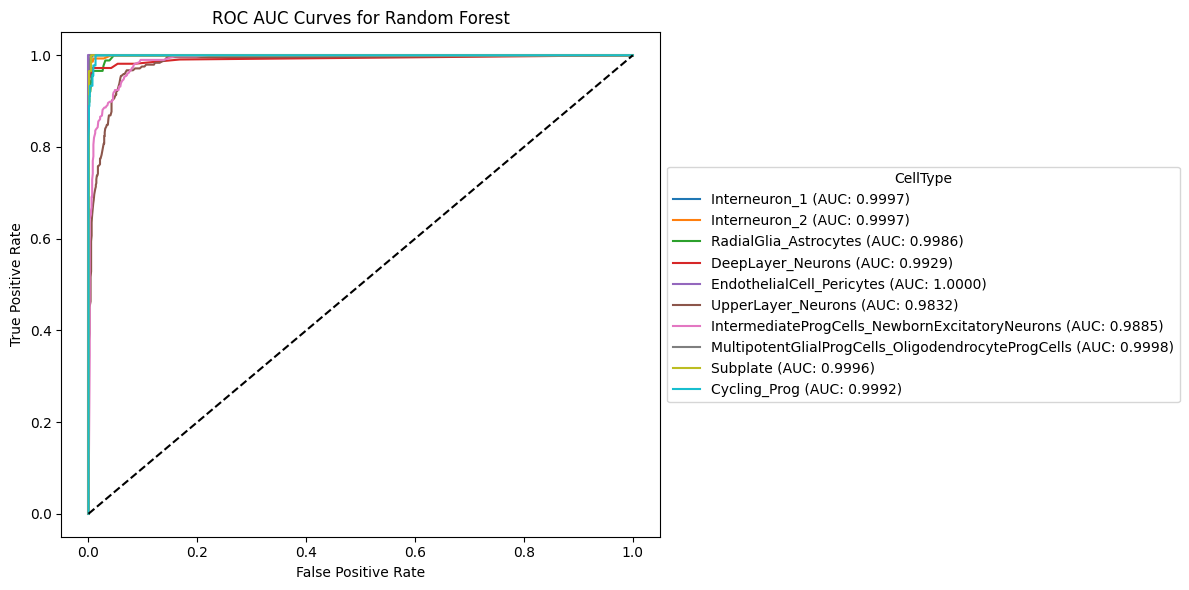

In [ ]:
# Step 1: Get predicted probabilities
predicted_probabilities = forest.predict_proba(X_test)  # shape (n_samples, n_classes)

# If Y_test is pandas Series, convert to numpy
true_classes = Y_test.to_numpy()


# Step 2: Compute overall multi-class ROC AUC
auc_score = roc_auc_score(true_classes, predicted_probabilities, multi_class='ovr')
print("Overall ROC AUC score:", auc_score)

# Step 3: Plot ROC curves for each class
labels = list(CellType_mapper.keys())

plt.figure(figsize=(12, 6))

for i in range(predicted_probabilities.shape[1]):
    # Compute ROC curve for class i
    fpr, tpr, _ = roc_curve(true_classes == i, predicted_probabilities[:, i])
    # Compute AUC for class i
    auc = roc_auc_score(true_classes == i, predicted_probabilities[:, i])
    plt.plot(fpr, tpr, label=f"{labels[i]} (AUC: {auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curves for Random Forest")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, ncol=1, title="CellType")
plt.tight_layout()
plt.show()

In [ ]:
# Super Tree
from supertree import SuperTree

# SuperTree Plot
super_tree = SuperTree(forest.estimators_[1], X_train, Y_train, X.columns.tolist(), list(map(str, Y.unique())))
super_tree.show_tree()

Output hidden; open in https://colab.research.google.com to view.

## Part IV: Hierarchical Clustering

In [ ]:
# Libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

### Divisive - Linkage

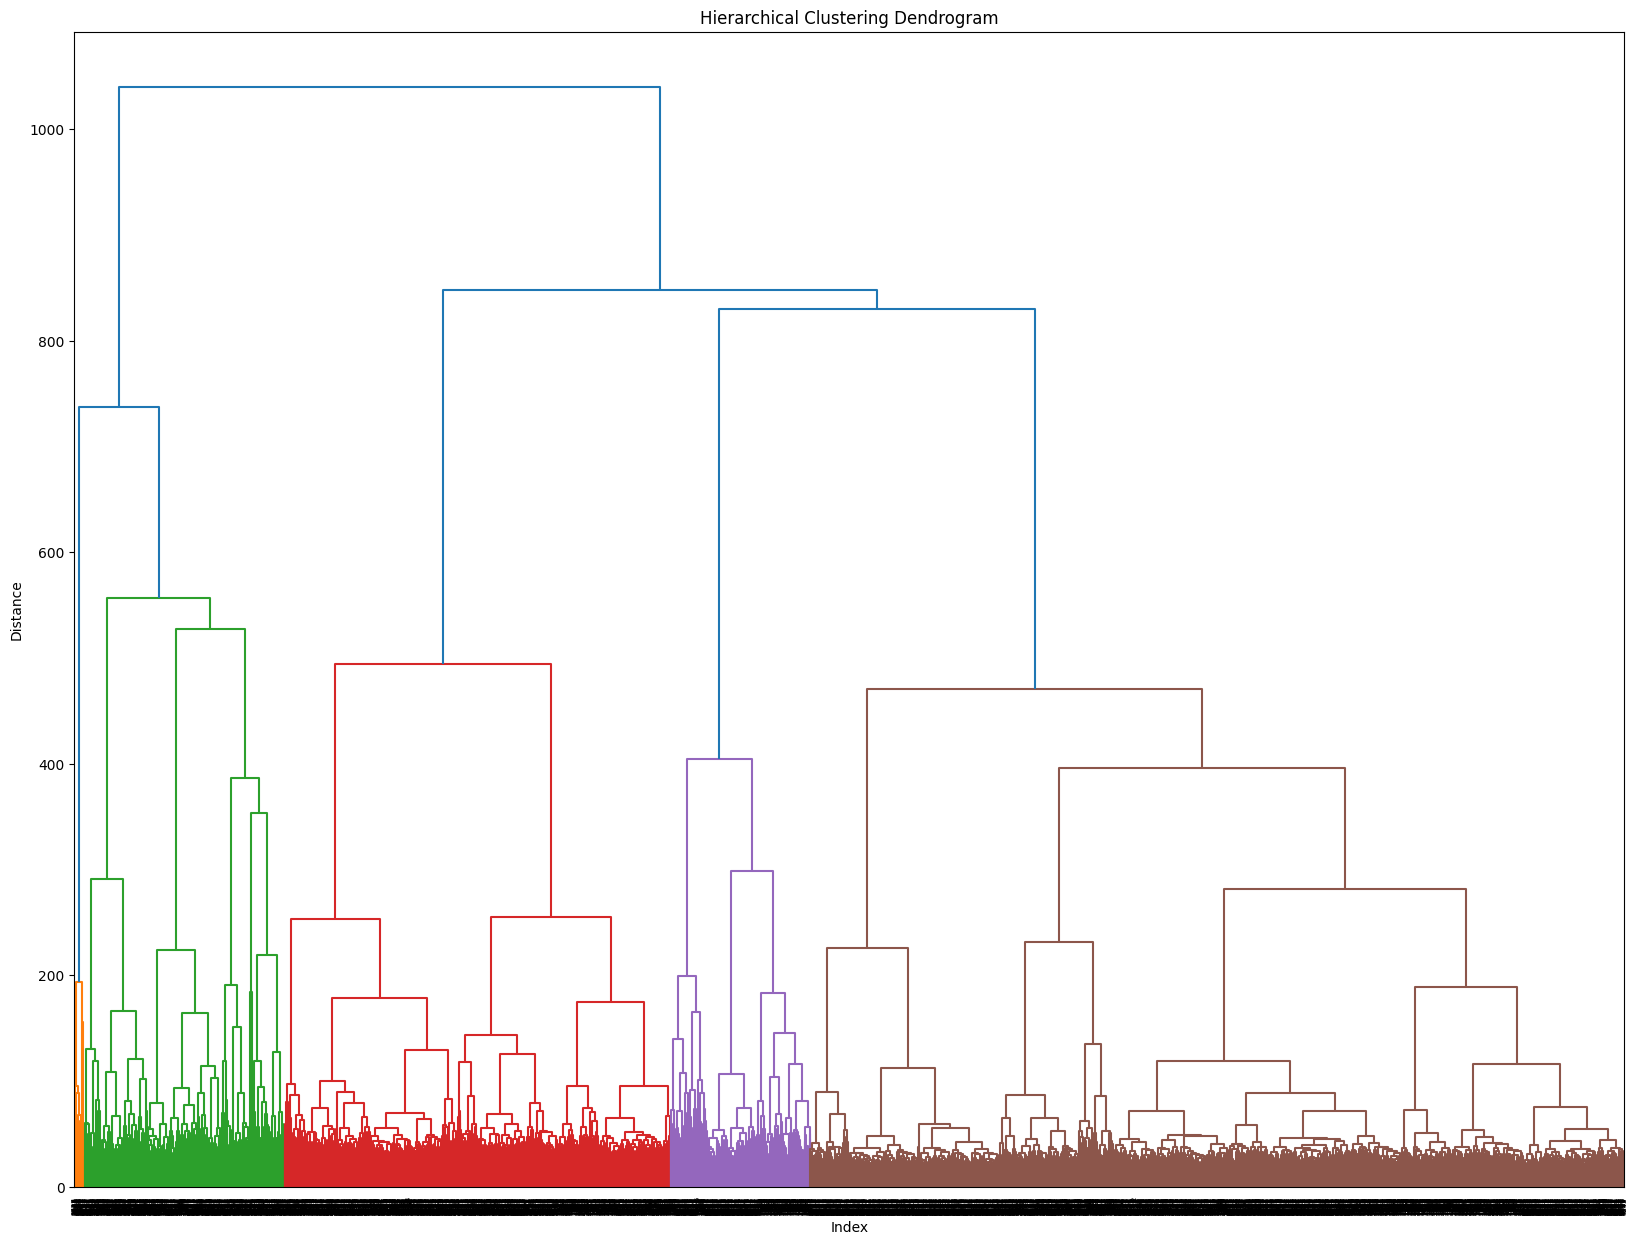

In [ ]:
# Model
Z = linkage(X, method='ward', metric="euclidean")

# Graficar el dendrograma
plt.figure(figsize=(20, 15))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

### Agglomerative

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
n_clusters = len(set(Y_train))
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,  linkage='ward')
labels = agg_clustering.fit_predict(X)

In [ ]:
# Create a DataFrame for better visualization
agglome_clust_df = pd.DataFrame({'Predicted': labels, 'CellType': Dataset_CellType_Labels})

# Create a cross-tabulation
contingency_table = pd.crosstab(agglome_clust_df['Predicted'], agglome_clust_df['CellType'])
contingency_table

CellType   Cycling_Prog  DeepLayer_Neurons  EndothelialCell_Pericytes  \
Predicted                                                               
0                     1                  1                          0   
1                     0                403                          0   
2                     3                  0                         13   
3                     0                  0                          0   
4                     0                  9                          0   
5                   221                  0                          0   
6                     0                  0                          0   
7                     0                  0                          0   
8                     0                127                          0   
9                     0                  0                          0   

CellType   IntermediateProgCells_NewbornExcitatoryNeurons  Interneuron_1  \
Predicted                                                                  
0                                                    1917              0   
1                                                       1              1   
2                                                       0              0   
3                                                       6            858   
4                                                       0              0   
5                                                       8              0   
6                                                       0              0   
7                                                       0             10   
8                                                      42              0   
9                                                       0              0   

CellType   Interneuron_2  MultipotentGlialProgCells_OligodendrocyteProgCells  \
Predicted                                                                      
0                      0                                                  0    
1                      0                                                  0    
2                      0                                                238    
3                      3                                                  1    
4                      0                                                  0    
5                      0                                                  0    
6                      0                                                  0    
7                    709                                                  0    
8                      0                                                  0    
9                      0                                                 43    

CellType   RadialGlia_Astrocytes  Subplate  UpperLayer_Neurons  
Predicted                                                       
0                             90         0                 584  
1                              0         4                  17  
2                              5         0                   0  
3                              5         0                   7  
4                              1       142                   0  
5                             31         0                   0  
6                            307         0                   0  
7                              0         0                   0  
8                              0         0                 610  
9                              1         0                   0

In [ ]:
contingency_table.idxmax(axis=0)

CellType
Cycling_Prog                                          5
DeepLayer_Neurons                                     1
EndothelialCell_Pericytes                             2
IntermediateProgCells_NewbornExcitatoryNeurons        0
Interneuron_1                                         3
Interneuron_2                                         7
MultipotentGlialProgCells_OligodendrocyteProgCells    2
RadialGlia_Astrocytes                                 6
Subplate                                              4
UpperLayer_Neurons                                    8
dtype: int64

## Part V: Gradient Boosting Tree

In [ ]:
# Libraries
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
# Model
gbc = GradientBoostingClassifier(n_estimators=10)

# Fit
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=10)

In [ ]:
# Predict
Y_pred = gbc.predict(X_test)

# Report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       174
           1       0.99      0.99      0.99       142
           2       0.99      0.90      0.94        88
           3       0.98      0.94      0.96       108
           4       1.00      1.00      1.00         3
           5       0.87      0.82      0.84       244
           6       0.87      0.93      0.90       395
           7       0.96      0.95      0.95        56
           8       0.96      0.93      0.95        29
           9       0.93      0.91      0.92        45

    accuracy                           0.92      1284
   macro avg       0.95      0.93      0.94      1284
weighted avg       0.92      0.92      0.92      1284



Overall ROC AUC score: 0.9954908181838442


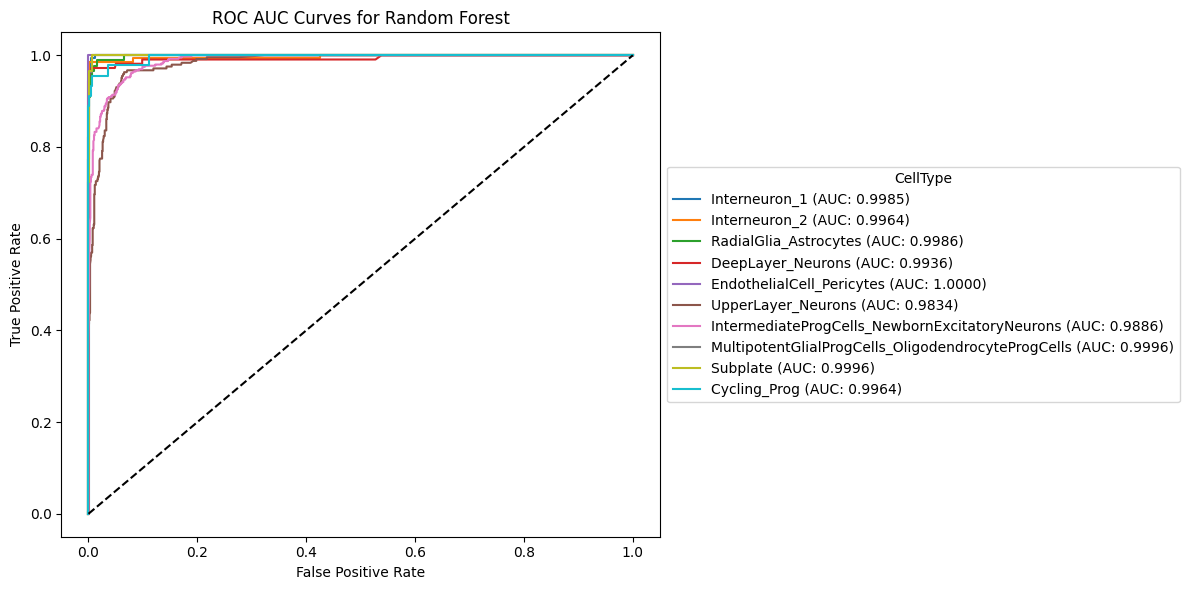

In [ ]:
# Step 1: Get predicted probabilities
predicted_probabilities = gbc.predict_proba(X_test)  # shape (n_samples, n_classes)

# If Y_test is pandas Series, convert to numpy
true_classes = Y_test.to_numpy()

# Step 2: Compute overall multi-class ROC AUC
auc_score = roc_auc_score(true_classes, predicted_probabilities, multi_class='ovr')
print("Overall ROC AUC score:", auc_score)

# Step 3: Plot ROC curves for each class
labels = list(CellType_mapper.keys())

plt.figure(figsize=(12, 6))

for i in range(predicted_probabilities.shape[1]):
    # Compute ROC curve for class i
    fpr, tpr, _ = roc_curve(true_classes == i, predicted_probabilities[:, i])
    # Compute AUC for class i
    auc = roc_auc_score(true_classes == i, predicted_probabilities[:, i])
    plt.plot(fpr, tpr, label=f"{labels[i]} (AUC: {auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curves for Random Forest")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, ncol=1, title="CellType")
plt.tight_layout()
plt.show()

In [ ]:
# Super Tree
from supertree import SuperTree

# SuperTree Plot
super_tree = SuperTree(gbc, X_train, Y_train, X.columns.tolist(), list(map(str, Y.unique())))
super_tree.show_tree()

Output hidden; open in https://colab.research.google.com to view.

## Part VI: Neural Network

In [ ]:
# PyTorch Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
# Select device to run in
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Create tensors
# X tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float).to(device)

# Y tensors
Y_train_tensor = torch.tensor(Y_train, dtype=torch.int64).to(device)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.int64).to(device)

<ipython-input-103-50269cc7a6f6>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_train_tensor = torch.tensor(Y_train, dtype=torch.int64).to(device)
<ipython-input-103-50269cc7a6f6>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_test_tensor = torch.tensor(Y_test, dtype=torch.int64).to(device)


In [ ]:
# Simple Classifier Class
class SimpleClassifier(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.layer_1 = nn.Linear(in_features, 128)
        self.layer_2 = nn.Linear(128, 256)
        self.layer_3 = nn.Linear(256, 128)
        self.layer_4 = nn.Linear(128, 64)
        self.layer_5 = nn.Linear(64, 32)
        self.layer_6 = nn.Linear(32, 16)
        self.layer_7 = nn.Linear(16, out_features)

    def forward(self, x):
        x = self.layer_7(self.layer_6(self.layer_5(self.layer_4(self.layer_3(self.layer_2(self.layer_1(x)))))))
        return x

In [ ]:
# Define features and classes
in_features = X_train.shape[1]
num_classes = len(set(Y_train))

# Create classifier model object
model = SimpleClassifier(in_features, num_classes).to(device)

In [ ]:
# Optimization criteria
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Training
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor)

    _, predicted_labels = torch.max(outputs, 1)
    correct_predictions = (predicted_labels == Y_train_tensor).sum().item()

    total_samples = Y_train_tensor.size(0)
    accuracy = correct_predictions / total_samples

    # Accuracy
    #accuracy = accuracy_score(Y_train_tensor.cpu().numpy(), predicted_labels.cpu().numpy())

    # BackPropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")

Epoch [100/1000], Loss: 0.1000, Accuracy: 0.9585
Epoch [200/1000], Loss: 0.0871, Accuracy: 0.9626
Epoch [300/1000], Loss: 0.1558, Accuracy: 0.9412
Epoch [400/1000], Loss: 0.0921, Accuracy: 0.9624
Epoch [500/1000], Loss: 0.0902, Accuracy: 0.9626
Epoch [600/1000], Loss: 0.0893, Accuracy: 0.9626
Epoch [700/1000], Loss: 0.0887, Accuracy: 0.9632
Epoch [800/1000], Loss: 0.0883, Accuracy: 0.9634
Epoch [900/1000], Loss: 0.0881, Accuracy: 0.9630
Epoch [1000/1000], Loss: 0.0876, Accuracy: 0.9632


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Model Evaluation
model.eval()
with torch.inference_mode():
    outputs = model(X_test_tensor)
    probabilities = F.softmax(outputs, dim=1)
    _, predicted_labels = torch.max(outputs, 1)

    accuracy = accuracy_score(Y_test, predicted_labels.numpy())
    f1 = f1_score(Y_test, predicted_labels.numpy(), average='weighted')
    precision = precision_score(Y_test, predicted_labels.numpy(), average='weighted')
    recall = recall_score(Y_test, predicted_labels.numpy(), average='weighted')
    predicted_tensor = predicted_labels.clone().detach()
    loss = criterion(outputs, predicted_tensor)

    print(f"Test Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

Test Loss: 0.0513, Accuracy: 0.9058, Precision: 0.9055, Recall: 0.9058, F1-score: 0.9052


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
n_clusters = len(set(Y_train))
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,  linkage='ward')
labels = agg_clustering.fit_predict(X)

In [ ]:
# Create a DataFrame for better visualization
agglome_clust_df = pd.DataFrame({'Predicted': labels, 'CellType': Dataset_CellType_Labels})

# Create a cross-tabulation
contingency_table = pd.crosstab(agglome_clust_df['Predicted'], agglome_clust_df['CellType'])
contingency_table

In [ ]:
contingency_table.idxmax(axis=0)

In [ ]:
# Report
from sklearn.metrics import classification_report

print(classification_report(Y_test, predicted_labels.numpy()))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       174
           1       0.96      0.98      0.97        56
           2       0.97      0.98      0.98       142
           3       0.91      0.95      0.93       108
           4       0.92      0.86      0.89        88
           5       1.00      1.00      1.00         3
           6       0.91      0.93      0.92        45
           7       0.96      0.83      0.89        29
           8       0.84      0.79      0.81       244
           9       0.88      0.92      0.90       395

    accuracy                           0.91      1284
   macro avg       0.93      0.92      0.93      1284
weighted avg       0.91      0.91      0.91      1284



ROC AUC scores: 0.9925886060390757


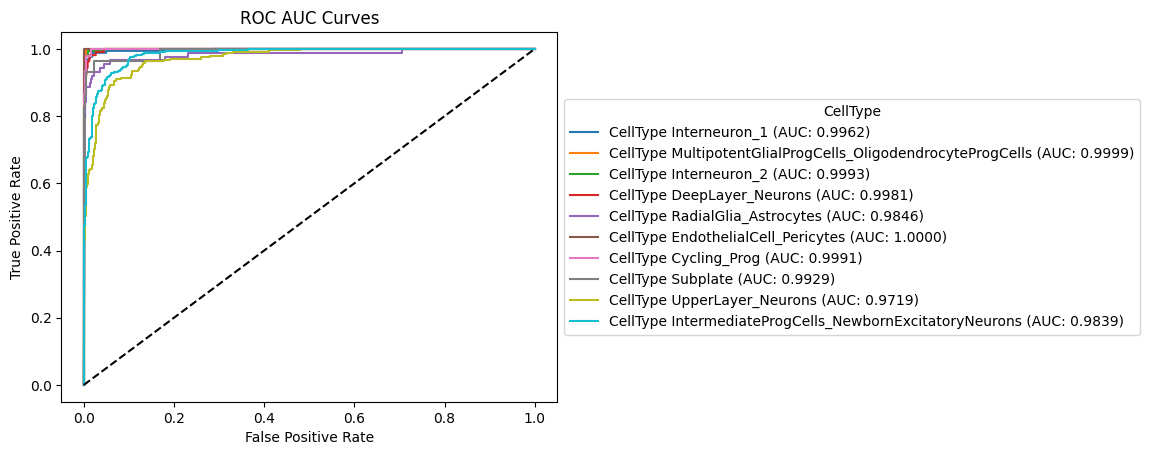

In [ ]:
true_classes = Y_test.to_numpy()  # Convert to numpy array
predicted_probabilities = probabilities.numpy()  # Convert to numpy array

auc_scores = roc_auc_score(true_classes, predicted_probabilities, multi_class='ovr')
print("ROC AUC scores:", auc_scores)

labels = list(CellType_mapper.keys())

# Plot ROC AUC curves for each class
for i in range(predicted_probabilities.shape[1]):
    fpr, tpr, _ = roc_curve(true_classes == i, predicted_probabilities[:, i])
    auc = roc_auc_score(Y_test == i, predicted_probabilities[:, i])
    plt.plot(fpr, tpr, label=f"CellType {labels[i]} (AUC: {auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curves")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, ncol=1, title="CellType")
plt.show()

# Dataset III: HSPC

## Part I: Create working Dataset

In [ ]:
# Usually required libraries
import numpy as np
import pandas as pd

# Muon
import muon as mu
from muon import atac as ac

# ScanPy
import scanpy as sc

In [ ]:
# Read DPTs dataset
dpts = pd.read_csv("/content/drive/MyDrive/GraduateCourseAI/PROJECT/DATASETS/dpts_HSPC.csv", index_col=0)
dpts

dpt_RNA_100  dpt_ANNE_union  dpt_ANNE_p_union  \
AAACAGCCAAACCTTG-1     0.643446        0.626461          0.629047   
AAACAGCCACCCTCAC-1     0.593643        0.517288          0.520902   
AAACATGCAATCGCAC-1     0.546020        0.570766          0.574470   
AAACATGCACAGCCTG-1     0.671969        0.657236          0.661533   
AAACATGCAGAGGCTA-1     0.268421        0.226474          0.225973   
...                         ...             ...               ...   
TTTGTTGGTGTTAAAC-1     0.035190        0.026203          0.026153   
TTTGTTGGTGTTGTGA-1     0.557103        0.586968          0.591524   
TTTGTTGGTTACCTGT-1     0.511841        0.512388          0.515432   
TTTGTTGGTTCCGGGA-1     0.579047        0.581400          0.585427   
TTTGTTGGTTGCCTCA-1     0.316260        0.260418          0.260474   

                    dpt_ANNE_inter  dpt_ATAC_100   dpt_WNN   dpt_SNF  \
AAACAGCCAAACCTTG-1        0.009882      0.598124  0.589163  0.011645   
AAACAGCCACCCTCAC-1        0.009491      0.756461  0.689705  0.007867   
AAACATGCAATCGCAC-1        0.008522      0.809076  0.723967  0.000416   
AAACATGCACAGCCTG-1        0.014892      0.832734  0.789283  0.018465   
AAACATGCAGAGGCTA-1        0.003797      0.317175  0.374096  0.013123   
...                            ...           ...       ...       ...   
TTTGTTGGTGTTAAAC-1        0.001254      0.080130  0.034881  0.001926   
TTTGTTGGTGTTGTGA-1        0.012997      0.763580  0.695865  0.028932   
TTTGTTGGTTACCTGT-1        0.008996      0.569852  0.585565  0.001597   
TTTGTTGGTTCCGGGA-1        0.008988      0.732033  0.717951  0.043646   
TTTGTTGGTTGCCTCA-1        0.003988      0.361905  0.412662  0.010105   

                                            CellType  
AAACAGCCAAACCTTG-1                       Granulocyte  
AAACAGCCACCCTCAC-1                       Erythrocyte  
AAACATGCAATCGCAC-1                       Erythrocyte  
AAACATGCACAGCCTG-1                Prog_MegaKaryocyte  
AAACATGCAGAGGCTA-1  Lymphoid_Primed_Multipotent_Prog  
...                                              ...  
TTTGTTGGTGTTAAAC-1          Hematopoietic_Stem_Cells  
TTTGTTGGTGTTGTGA-1    Megakaryocyte_Erythrocyte_Prog  
TTTGTTGGTTACCTGT-1    Megakaryocyte_Erythrocyte_Prog  
TTTGTTGGTTCCGGGA-1                       Erythrocyte  
TTTGTTGGTTGCCTCA-1  Lymphoid_Primed_Multipotent_Prog  

[9190 rows x 8 columns]

In [ ]:
# Read ATAC modality
#adata_atac = sc.read("/content/drive/MyDrive/GraduateCourseAI/DATASETS/HSPC_Peak_Def.h5ad")
# Read RNA modality
adata_rna = sc.read("/content/drive/MyDrive/GraduateCourseAI/PROJECT/DATASETS/HSPC_GEX_Def.h5ad")

# Order Indexes
#adata_atac = adata_atac[adata_atac.obs_names.sort_values()]
adata_rna = adata_rna[adata_rna.obs_names.sort_values()]

# Get common Cells
intersect_cells_indxs = set(adata_rna.obs_names.intersection(dpts.index))

# Sort RNA AnnData
cells_indxs_rna = [indx in intersect_cells_indxs for indx in adata_rna.obs_names]
adata_rna = adata_rna[cells_indxs_rna]
adata_rna.obs.sort_index(inplace=True)

# Sort ATAC AnnData
#cells_indxs_atac = [indx in intersect_cells_indxs for indx in adata_atac.obs_names]
#adata_atac = adata_atac[cells_indxs_atac]
#adata_atac.obs.sort_index(inplace=True)

# Join both Modalities to forge MuData Object
mdata = mu.MuData({'rna': adata_rna})#, 'atac': adata_atac})
# Unique variables
mdata.var_names_make_unique()
# Check
mdata

/usr/local/lib/python3.11/dist-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/usr/local/lib/python3.11/dist-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:835: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    

MuData object with n_obs × n_vars = 9190 × 6721
  var:	'n_cells', 'log_n_cells', 'MT', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'passes_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
  1 modality
    rna:	9190 x 6721
      obs:	'CellType', 'n_features', 'log_n_features', 'n_counts', 'log_n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_MT', 'pct_counts_MT', 'passes_filter', 'leiden', 'target'
      var:	'n_cells', 'log_n_cells', 'MT', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'passes_filter', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
      uns:	'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
      obsm:	'X_TopoAE', 'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'MAGIC'
      obsp:	'TopoAE_kNN', 'connectivities', 'distances'

In [ ]:
# Update CellTypes (pandas.core.series.Series)
mdata['rna'].obs.CellType = mdata['rna'].obs.CellType.replace({'GMP': 'Granulocyte_Macrophage_Prog', 'HSC': 'Hematopoietic_Stem_Cells', 'LMPP': 'Lymphoid_Primed_Multipotent_Prog', 'MEP': 'Megakaryocyte_Erythrocyte_Prog', 'MPP': 'Multi_Potent_Prog', 'Prog_DC': 'Prog_Dentritic_Cells', 'Prog_MK': 'Prog_MegaKaryocyte'})
#mdata['atac'].obs.CellType = mdata['atac'].obs.CellType.replace({'GMP': 'Granulocyte_Macrophage_Prog', 'HSC': 'Hematopoietic_Stem_Cells', 'LMPP': 'Lymphoid_Primed_Multipotent_Prog', 'MEP': 'Megakaryocyte_Erythrocyte_Prog', 'MPP': 'Multi_Potent_Prog', 'Prog_DC': 'Prog_Dentritic_Cells', 'Prog_MK': 'Prog_MegaKaryocyte'})

/tmp/ipython-input-43-3346258453.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  mdata['rna'].obs.CellType = mdata['rna'].obs.CellType.replace({'GMP': 'Granulocyte_Macrophage_Prog', 'HSC': 'Hematopoietic_Stem_Cells', 'LMPP': 'Lymphoid_Primed_Multipotent_Prog', 'MEP': 'Megakaryocyte_Erythrocyte_Prog', 'MPP': 'Multi_Potent_Prog', 'Prog_DC': 'Prog_Dentritic_Cells', 'Prog_MK': 'Prog_MegaKaryocyte'})


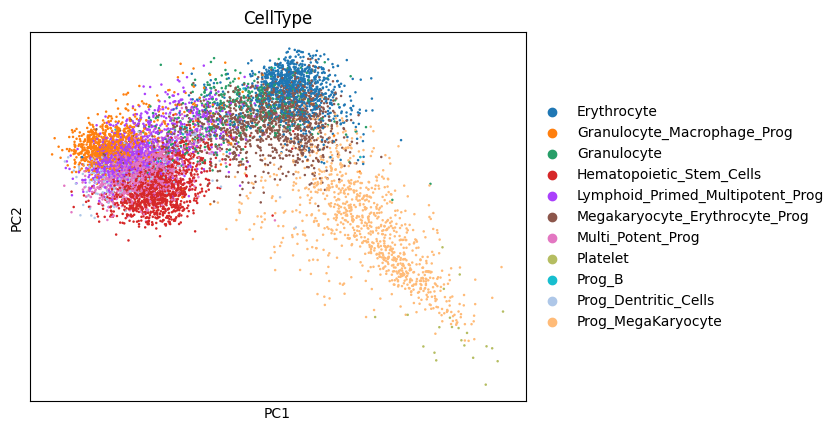

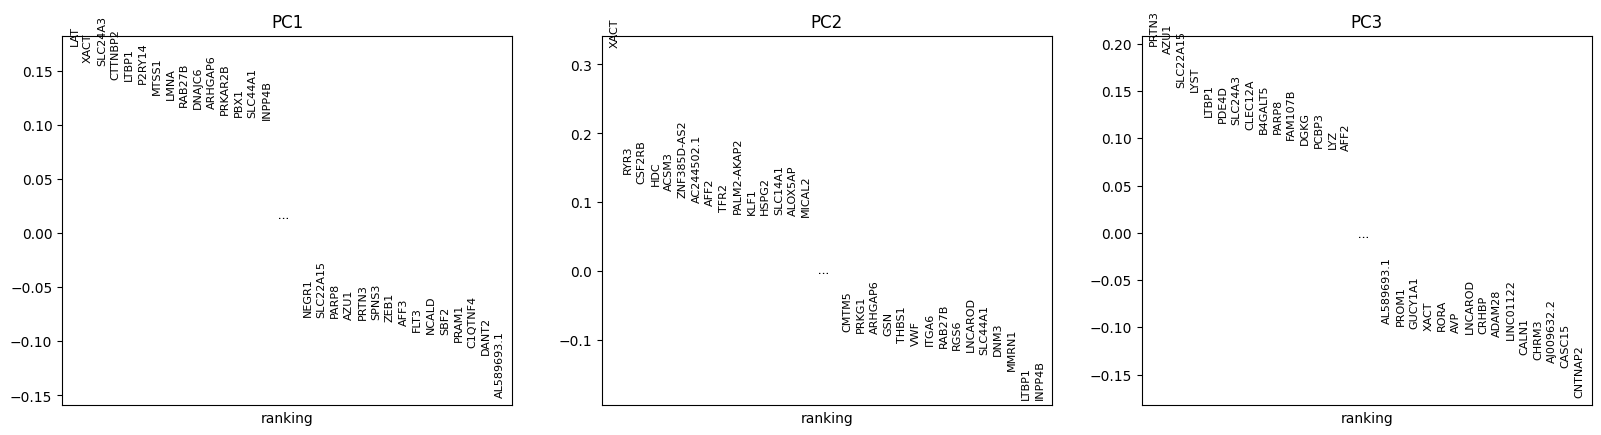

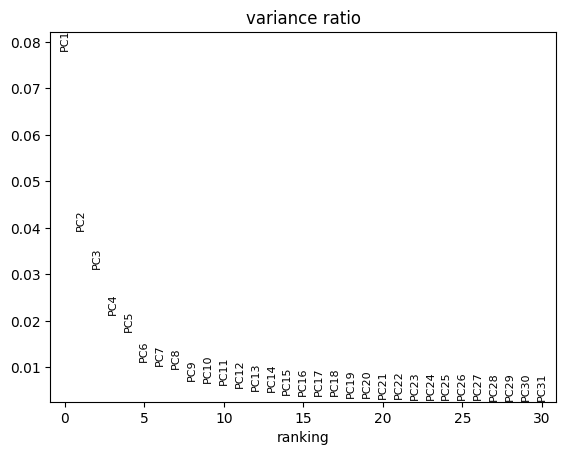

In [ ]:
# Principal Component Analysis for ATAC
sc.pp.pca(mdata['rna'], n_comps=200)
sc.pl.pca_overview(mdata['rna'], color="CellType")

In [ ]:
# RNA PCA -> dense
RNA_X = pd.DataFrame(mdata['rna'].obsm['X_pca'], index = dpts.index, columns=[f"PC_{i+1}" for i in range(mdata['rna'].obsm['X_pca'].shape[1])]).iloc[:, 0:200]
# Just keep a subset for trials
RNA_X

PC_1      PC_2      PC_3      PC_4      PC_5  \
AAACAGCCAAACCTTG-1  3.327165  1.092767  0.852941  4.641812 -4.726976   
AAACAGCCACCCTCAC-1  3.614133  1.783843 -0.809295 -0.088902  0.612079   
AAACATGCAATCGCAC-1  2.857431  3.097683 -1.877100 -0.889178  1.260580   
AAACATGCACAGCCTG-1  3.660876 -0.685331  0.318477 -1.654354 -1.048476   
AAACATGCAGAGGCTA-1 -2.645005  1.373100 -0.364326  2.075480  0.959682   
...                      ...       ...       ...       ...       ...   
TTTGTTGGTGTTAAAC-1 -1.480959 -2.151536 -4.346352  1.241154  1.226884   
TTTGTTGGTGTTGTGA-1  2.375275  3.275369 -0.463466 -0.916185  0.013335   
TTTGTTGGTTACCTGT-1  1.607412  1.000669  0.797535  0.990959 -1.672552   
TTTGTTGGTTCCGGGA-1  3.211114  2.896556 -0.371838 -1.355307 -0.491135   
TTTGTTGGTTGCCTCA-1 -2.654740 -0.318818  1.740810 -0.168748  0.213900   

                        PC_6      PC_7      PC_8      PC_9     PC_10  ...  \
AAACAGCCAAACCTTG-1  1.136201  3.821125  0.048882 -1.048786  0.501783  ...   
AAACAGCCACCCTCAC-1  1.226925  1.043513 -0.715315  0.431856 -1.086316  ...   
AAACATGCAATCGCAC-1  0.908487 -0.532377  0.035867 -0.231014  0.180443  ...   
AAACATGCACAGCCTG-1 -1.516821 -0.378069  1.131585  0.121669  0.310126  ...   
AAACATGCAGAGGCTA-1 -0.755730 -1.887307 -0.380138  0.237612  0.155585  ...   
...                      ...       ...       ...       ...       ...  ...   
TTTGTTGGTGTTAAAC-1 -0.678152  0.877990  0.650716  0.420509  1.397694  ...   
TTTGTTGGTGTTGTGA-1 -0.119486 -0.548161 -0.233501  0.421734 -0.134640  ...   
TTTGTTGGTTACCTGT-1 -0.055068  1.271829 -0.494887  0.061216 -0.134771  ...   
TTTGTTGGTTCCGGGA-1  0.167396 -0.081547  0.285426 -0.941605 -0.092965  ...   
TTTGTTGGTTGCCTCA-1 -0.416525 -0.130769  0.272440 -1.344750 -1.398116  ...   

                      PC_191    PC_192    PC_193    PC_194    PC_195  \
AAACAGCCAAACCTTG-1 -0.708900  0.568227 -0.085072  0.307992  0.289871   
AAACAGCCACCCTCAC-1  0.090694 -0.162673  0.621308  0.009569 -0.195992   
AAACATGCAATCGCAC-1  0.555958 -0.231453  0.250086  0.820883  0.156074   
AAACATGCACAGCCTG-1  0.503461  0.083113  0.399034  0.479686  0.174377   
AAACATGCAGAGGCTA-1  0.602227  0.904197  0.400613 -0.696265 -0.419747   
...                      ...       ...       ...       ...       ...   
TTTGTTGGTGTTAAAC-1 -0.264250  0.424973  0.264708 -0.406842 -0.319922   
TTTGTTGGTGTTGTGA-1 -0.302581 -0.550021  0.169888  0.009227  0.160478   
TTTGTTGGTTACCTGT-1 -0.365331 -0.350535  0.538567  0.032698 -0.445695   
TTTGTTGGTTCCGGGA-1  0.050593 -0.196342  0.356082 -0.477439 -0.155227   
TTTGTTGGTTGCCTCA-1 -0.171797  0.027726  0.005194  0.402132  0.233031   

                      PC_196    PC_197    PC_198    PC_199    PC_200  
AAACAGCCAAACCTTG-1  0.302829  0.297704  0.497089 -0.579348  0.252640  
AAACAGCCACCCTCAC-1  0.633726  0.303388 -0.662925 -0.339385  0.142819  
AAACATGCAATCGCAC-1  0.213173 -0.568903 -0.293175 -0.147449 -0.135874  
AAACATGCACAGCCTG-1  0.055311  0.340839  0.123964  0.027480 -0.476189  
AAACATGCAGAGGCTA-1 -0.155677  0.697950 -0.620378 -0.243312 -0.164318  
...                      ...       ...       ...       ...       ...  
TTTGTTGGTGTTAAAC-1  0.011675  0.735190 -0.171815  0.049471 -0.079650  
TTTGTTGGTGTTGTGA-1 -0.496224  0.168682 -0.322153  0.038508  0.751078  
TTTGTTGGTTACCTGT-1  0.088968  0.034775 -0.256843 -0.062669 -0.007842  
TTTGTTGGTTCCGGGA-1 -0.319640  0.102965 -0.068193 -0.281013  0.290735  
TTTGTTGGTTGCCTCA-1 -0.648419  0.158128 -0.328049 -0.106107 -0.313829  

[9190 rows x 200 columns]

In [ ]:
# RNA count matrix -> dense
#RNA_X = pd.DataFrame(mdata['rna'].X.toarray(), index = dpts.index, columns=[f"Gene_{i+1}" for i in range(mdata['rna'].X.shape[1])])
# Just keep a subset for trials
#RNA_X = RNA_X.iloc[:, :1000]
#RNA_X

In [ ]:
# ATAC count matrix -> dense
#ATAC_X = pd.DataFrame(mdata['atac'].X.toarray(), index = dpts.index, columns=[f"Peak_{i+1}" for i in range(mdata['atac'].X.shape[1])])
# Just keep a subset for trials
#ATAC_X = ATAC_X.iloc[:, :1000]
#ATAC_X

In [ ]:
# Concatenate datasets -> Dense
Datasets_concat = pd.concat([dpts, RNA_X], axis=1)
Datasets_concat = Datasets_concat[~Datasets_concat['CellType'].isin(['Platelet', 'Prog_B'])]
Datasets_concat

dpt_RNA_100  dpt_ANNE_union  dpt_ANNE_p_union  \
AAACAGCCAAACCTTG-1     0.643446        0.626461          0.629047   
AAACAGCCACCCTCAC-1     0.593643        0.517288          0.520902   
AAACATGCAATCGCAC-1     0.546020        0.570766          0.574470   
AAACATGCACAGCCTG-1     0.671969        0.657236          0.661533   
AAACATGCAGAGGCTA-1     0.268421        0.226474          0.225973   
...                         ...             ...               ...   
TTTGTTGGTGTTAAAC-1     0.035190        0.026203          0.026153   
TTTGTTGGTGTTGTGA-1     0.557103        0.586968          0.591524   
TTTGTTGGTTACCTGT-1     0.511841        0.512388          0.515432   
TTTGTTGGTTCCGGGA-1     0.579047        0.581400          0.585427   
TTTGTTGGTTGCCTCA-1     0.316260        0.260418          0.260474   

                    dpt_ANNE_inter  dpt_ATAC_100   dpt_WNN   dpt_SNF  \
AAACAGCCAAACCTTG-1        0.009882      0.598124  0.589163  0.011645   
AAACAGCCACCCTCAC-1        0.009491      0.756461  0.689705  0.007867   
AAACATGCAATCGCAC-1        0.008522      0.809076  0.723967  0.000416   
AAACATGCACAGCCTG-1        0.014892      0.832734  0.789283  0.018465   
AAACATGCAGAGGCTA-1        0.003797      0.317175  0.374096  0.013123   
...                            ...           ...       ...       ...   
TTTGTTGGTGTTAAAC-1        0.001254      0.080130  0.034881  0.001926   
TTTGTTGGTGTTGTGA-1        0.012997      0.763580  0.695865  0.028932   
TTTGTTGGTTACCTGT-1        0.008996      0.569852  0.585565  0.001597   
TTTGTTGGTTCCGGGA-1        0.008988      0.732033  0.717951  0.043646   
TTTGTTGGTTGCCTCA-1        0.003988      0.361905  0.412662  0.010105   

                                            CellType      PC_1      PC_2  ...  \
AAACAGCCAAACCTTG-1                       Granulocyte  3.327165  1.092767  ...   
AAACAGCCACCCTCAC-1                       Erythrocyte  3.614133  1.783843  ...   
AAACATGCAATCGCAC-1                       Erythrocyte  2.857431  3.097683  ...   
AAACATGCACAGCCTG-1                Prog_MegaKaryocyte  3.660876 -0.685331  ...   
AAACATGCAGAGGCTA-1  Lymphoid_Primed_Multipotent_Prog -2.645005  1.373100  ...   
...                                              ...       ...       ...  ...   
TTTGTTGGTGTTAAAC-1          Hematopoietic_Stem_Cells -1.480959 -2.151536  ...   
TTTGTTGGTGTTGTGA-1    Megakaryocyte_Erythrocyte_Prog  2.375275  3.275369  ...   
TTTGTTGGTTACCTGT-1    Megakaryocyte_Erythrocyte_Prog  1.607412  1.000669  ...   
TTTGTTGGTTCCGGGA-1                       Erythrocyte  3.211114  2.896556  ...   
TTTGTTGGTTGCCTCA-1  Lymphoid_Primed_Multipotent_Prog -2.654740 -0.318818  ...   

                      PC_191    PC_192    PC_193    PC_194    PC_195  \
AAACAGCCAAACCTTG-1 -0.708900  0.568227 -0.085072  0.307992  0.289871   
AAACAGCCACCCTCAC-1  0.090694 -0.162673  0.621308  0.009569 -0.195992   
AAACATGCAATCGCAC-1  0.555958 -0.231453  0.250086  0.820883  0.156074   
AAACATGCACAGCCTG-1  0.503461  0.083113  0.399034  0.479686  0.174377   
AAACATGCAGAGGCTA-1  0.602227  0.904197  0.400613 -0.696265 -0.419747   
...                      ...       ...       ...       ...       ...   
TTTGTTGGTGTTAAAC-1 -0.264250  0.424973  0.264708 -0.406842 -0.319922   
TTTGTTGGTGTTGTGA-1 -0.302581 -0.550021  0.169888  0.009227  0.160478   
TTTGTTGGTTACCTGT-1 -0.365331 -0.350535  0.538567  0.032698 -0.445695   
TTTGTTGGTTCCGGGA-1  0.050593 -0.196342  0.356082 -0.477439 -0.155227   
TTTGTTGGTTGCCTCA-1 -0.171797  0.027726  0.005194  0.402132  0.233031   

                      PC_196    PC_197    PC_198    PC_199    PC_200  
AAACAGCCAAACCTTG-1  0.302829  0.297704  0.497089 -0.579348  0.252640  
AAACAGCCACCCTCAC-1  0.633726  0.303388 -0.662925 -0.339385  0.142819  
AAACATGCAATCGCAC-1  0.213173 -0.568903 -0.293175 -0.147449 -0.135874  
AAACATGCACAGCCTG-1  0.055311  0.340839  0.123964  0.027480 -0.476189  
AAACATGCAGAGGCTA-1 -0.155677  0.697950 -0.620378 -0.243312 -0.164318  
...                      ...       ...       ...       ...    

## Part II: Split Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# # Vectorize Cell Type Labels -> CellType Mapper
CellType_mapper = {celltype: i for i, celltype in enumerate(set(Datasets_concat["CellType"]))}
CellType_mapper

{'Multi_Potent_Prog': 0,
 'Megakaryocyte_Erythrocyte_Prog': 1,
 'Granulocyte': 2,
 'Erythrocyte': 3,
 'Hematopoietic_Stem_Cells': 4,
 'Prog_MegaKaryocyte': 5,
 'Lymphoid_Primed_Multipotent_Prog': 6,
 'Prog_Dentritic_Cells': 7,
 'Granulocyte_Macrophage_Prog': 8}

In [ ]:
# Process Dataset

# Remove useless cols
Dataset = Datasets_concat.drop(['dpt_RNA_100', 'dpt_ANNE_union', 'dpt_ANNE_inter', 'dpt_ATAC_100', 'dpt_WNN', 'dpt_SNF'], axis=1)

# Remove Inf and NaN
Dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
Dataset.dropna(inplace=True)

# Mapped CellTypes
Dataset_CellType_Labels = Dataset["CellType"]
Dataset["CellType"] = Dataset["CellType"].map(CellType_mapper)

# Check
Dataset

dpt_ANNE_p_union  CellType      PC_1      PC_2      PC_3  \
AAACAGCCAAACCTTG-1          0.629047         2  3.327165  1.092767  0.852941   
AAACAGCCACCCTCAC-1          0.520902         3  3.614133  1.783843 -0.809295   
AAACATGCAATCGCAC-1          0.574470         3  2.857431  3.097683 -1.877100   
AAACATGCACAGCCTG-1          0.661533         5  3.660876 -0.685331  0.318477   
AAACATGCAGAGGCTA-1          0.225973         6 -2.645005  1.373100 -0.364326   
...                              ...       ...       ...       ...       ...   
TTTGTTGGTGTTAAAC-1          0.026153         4 -1.480959 -2.151536 -4.346352   
TTTGTTGGTGTTGTGA-1          0.591524         1  2.375275  3.275369 -0.463466   
TTTGTTGGTTACCTGT-1          0.515432         1  1.607412  1.000669  0.797535   
TTTGTTGGTTCCGGGA-1          0.585427         3  3.211114  2.896556 -0.371838   
TTTGTTGGTTGCCTCA-1          0.260474         6 -2.654740 -0.318818  1.740810   

                        PC_4      PC_5      PC_6      PC_7      PC_8  ...  \
AAACAGCCAAACCTTG-1  4.641812 -4.726976  1.136201  3.821125  0.048882  ...   
AAACAGCCACCCTCAC-1 -0.088902  0.612079  1.226925  1.043513 -0.715315  ...   
AAACATGCAATCGCAC-1 -0.889178  1.260580  0.908487 -0.532377  0.035867  ...   
AAACATGCACAGCCTG-1 -1.654354 -1.048476 -1.516821 -0.378069  1.131585  ...   
AAACATGCAGAGGCTA-1  2.075480  0.959682 -0.755730 -1.887307 -0.380138  ...   
...                      ...       ...       ...       ...       ...  ...   
TTTGTTGGTGTTAAAC-1  1.241154  1.226884 -0.678152  0.877990  0.650716  ...   
TTTGTTGGTGTTGTGA-1 -0.916185  0.013335 -0.119486 -0.548161 -0.233501  ...   
TTTGTTGGTTACCTGT-1  0.990959 -1.672552 -0.055068  1.271829 -0.494887  ...   
TTTGTTGGTTCCGGGA-1 -1.355307 -0.491135  0.167396 -0.081547  0.285426  ...   
TTTGTTGGTTGCCTCA-1 -0.168748  0.213900 -0.416525 -0.130769  0.272440  ...   

                      PC_191    PC_192    PC_193    PC_194    PC_195  \
AAACAGCCAAACCTTG-1 -0.708900  0.568227 -0.085072  0.307992  0.289871   
AAACAGCCACCCTCAC-1  0.090694 -0.162673  0.621308  0.009569 -0.195992   
AAACATGCAATCGCAC-1  0.555958 -0.231453  0.250086  0.820883  0.156074   
AAACATGCACAGCCTG-1  0.503461  0.083113  0.399034  0.479686  0.174377   
AAACATGCAGAGGCTA-1  0.602227  0.904197  0.400613 -0.696265 -0.419747   
...                      ...       ...       ...       ...       ...   
TTTGTTGGTGTTAAAC-1 -0.264250  0.424973  0.264708 -0.406842 -0.319922   
TTTGTTGGTGTTGTGA-1 -0.302581 -0.550021  0.169888  0.009227  0.160478   
TTTGTTGGTTACCTGT-1 -0.365331 -0.350535  0.538567  0.032698 -0.445695   
TTTGTTGGTTCCGGGA-1  0.050593 -0.196342  0.356082 -0.477439 -0.155227   
TTTGTTGGTTGCCTCA-1 -0.171797  0.027726  0.005194  0.402132  0.233031   

                      PC_196    PC_197    PC_198    PC_199    PC_200  
AAACAGCCAAACCTTG-1  0.302829  0.297704  0.497089 -0.579348  0.252640  
AAACAGCCACCCTCAC-1  0.633726  0.303388 -0.662925 -0.339385  0.142819  
AAACATGCAATCGCAC-1  0.213173 -0.568903 -0.293175 -0.147449 -0.135874  
AAACATGCACAGCCTG-1  0.055311  0.340839  0.123964  0.027480 -0.476189  
AAACATGCAGAGGCTA-1 -0.155677  0.697950 -0.620378 -0.243312 -0.164318  
...                      ...       ...       ...       ...       ...  
TTTGTTGGTGTTAAAC-1  0.011675  0.735190 -0.171815  0.049471 -0.079650  
TTTGTTGGTGTTGTGA-1 -0.496224  0.168682 -0.322153  0.038508  0.751078  
TTTGTTGGTTACCTGT-1  0.088968  0.034775 -0.256843 -0.062669 -0.007842  
TTTGTTGGTTCCGGGA-1 -0.319640  0.102965 -0.068193 -0.281013  0.290735  
TTTGTTGGTTGCCTCA-1 -0.648419  0.158128 -0.328049 -0.106107 -0.313829  

[9146 rows x 202 columns]

In [ ]:
# Get Multi-class labesl
Y = Dataset["CellType"]
Y

AAACAGCCAAACCTTG-1    2
AAACAGCCACCCTCAC-1    3
AAACATGCAATCGCAC-1    3
AAACATGCACAGCCTG-1    5
AAACATGCAGAGGCTA-1    6
                     ..
TTTGTTGGTGTTAAAC-1    4
TTTGTTGGTGTTGTGA-1    1
TTTGTTGGTTACCTGT-1    1
TTTGTTGGTTCCGGGA-1    3
TTTGTTGGTTGCCTCA-1    6
Name: CellType, Length: 9146, dtype: int64

In [ ]:
# Get Training Data matrix
X = Dataset.drop("CellType", axis=1)
X

dpt_ANNE_p_union      PC_1      PC_2      PC_3      PC_4  \
AAACAGCCAAACCTTG-1          0.629047  3.327165  1.092767  0.852941  4.641812   
AAACAGCCACCCTCAC-1          0.520902  3.614133  1.783843 -0.809295 -0.088902   
AAACATGCAATCGCAC-1          0.574470  2.857431  3.097683 -1.877100 -0.889178   
AAACATGCACAGCCTG-1          0.661533  3.660876 -0.685331  0.318477 -1.654354   
AAACATGCAGAGGCTA-1          0.225973 -2.645005  1.373100 -0.364326  2.075480   
...                              ...       ...       ...       ...       ...   
TTTGTTGGTGTTAAAC-1          0.026153 -1.480959 -2.151536 -4.346352  1.241154   
TTTGTTGGTGTTGTGA-1          0.591524  2.375275  3.275369 -0.463466 -0.916185   
TTTGTTGGTTACCTGT-1          0.515432  1.607412  1.000669  0.797535  0.990959   
TTTGTTGGTTCCGGGA-1          0.585427  3.211114  2.896556 -0.371838 -1.355307   
TTTGTTGGTTGCCTCA-1          0.260474 -2.654740 -0.318818  1.740810 -0.168748   

                        PC_5      PC_6      PC_7      PC_8      PC_9  ...  \
AAACAGCCAAACCTTG-1 -4.726976  1.136201  3.821125  0.048882 -1.048786  ...   
AAACAGCCACCCTCAC-1  0.612079  1.226925  1.043513 -0.715315  0.431856  ...   
AAACATGCAATCGCAC-1  1.260580  0.908487 -0.532377  0.035867 -0.231014  ...   
AAACATGCACAGCCTG-1 -1.048476 -1.516821 -0.378069  1.131585  0.121669  ...   
AAACATGCAGAGGCTA-1  0.959682 -0.755730 -1.887307 -0.380138  0.237612  ...   
...                      ...       ...       ...       ...       ...  ...   
TTTGTTGGTGTTAAAC-1  1.226884 -0.678152  0.877990  0.650716  0.420509  ...   
TTTGTTGGTGTTGTGA-1  0.013335 -0.119486 -0.548161 -0.233501  0.421734  ...   
TTTGTTGGTTACCTGT-1 -1.672552 -0.055068  1.271829 -0.494887  0.061216  ...   
TTTGTTGGTTCCGGGA-1 -0.491135  0.167396 -0.081547  0.285426 -0.941605  ...   
TTTGTTGGTTGCCTCA-1  0.213900 -0.416525 -0.130769  0.272440 -1.344750  ...   

                      PC_191    PC_192    PC_193    PC_194    PC_195  \
AAACAGCCAAACCTTG-1 -0.708900  0.568227 -0.085072  0.307992  0.289871   
AAACAGCCACCCTCAC-1  0.090694 -0.162673  0.621308  0.009569 -0.195992   
AAACATGCAATCGCAC-1  0.555958 -0.231453  0.250086  0.820883  0.156074   
AAACATGCACAGCCTG-1  0.503461  0.083113  0.399034  0.479686  0.174377   
AAACATGCAGAGGCTA-1  0.602227  0.904197  0.400613 -0.696265 -0.419747   
...                      ...       ...       ...       ...       ...   
TTTGTTGGTGTTAAAC-1 -0.264250  0.424973  0.264708 -0.406842 -0.319922   
TTTGTTGGTGTTGTGA-1 -0.302581 -0.550021  0.169888  0.009227  0.160478   
TTTGTTGGTTACCTGT-1 -0.365331 -0.350535  0.538567  0.032698 -0.445695   
TTTGTTGGTTCCGGGA-1  0.050593 -0.196342  0.356082 -0.477439 -0.155227   
TTTGTTGGTTGCCTCA-1 -0.171797  0.027726  0.005194  0.402132  0.233031   

                      PC_196    PC_197    PC_198    PC_199    PC_200  
AAACAGCCAAACCTTG-1  0.302829  0.297704  0.497089 -0.579348  0.252640  
AAACAGCCACCCTCAC-1  0.633726  0.303388 -0.662925 -0.339385  0.142819  
AAACATGCAATCGCAC-1  0.213173 -0.568903 -0.293175 -0.147449 -0.135874  
AAACATGCACAGCCTG-1  0.055311  0.340839  0.123964  0.027480 -0.476189  
AAACATGCAGAGGCTA-1 -0.155677  0.697950 -0.620378 -0.243312 -0.164318  
...                      ...       ...       ...       ...       ...  
TTTGTTGGTGTTAAAC-1  0.011675  0.735190 -0.171815  0.049471 -0.079650  
TTTGTTGGTGTTGTGA-1 -0.496224  0.168682 -0.322153  0.038508  0.751078  
TTTGTTGGTTACCTGT-1  0.088968  0.034775 -0.256843 -0.062669 -0.007842  
TTTGTTGGTTCCGGGA-1 -0.319640  0.102965 -0.068193 -0.281013  0.290735  
TTTGTTGGTTGCCTCA-1 -0.648419  0.158128 -0.328049 -0.106107 -0.313829  

[9146 rows x 201 columns]

In [ ]:
# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=8, stratify=Y)

In [ ]:
# Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Part III: Random Forest

In [ ]:
# Library
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report

In [ ]:
# Model
forest = RandomForestClassifier(n_estimators=100, max_samples=0.8, max_features=0.8)

# Fit
forest.fit(X_train, Y_train)

RandomForestClassifier(max_features=0.8, max_samples=0.8)

In [ ]:
# Predict
Y_pred = forest.predict(X_test)

# Report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62       267
           1       0.70      0.76      0.73       259
           2       0.90      0.89      0.90        93
           3       0.86      0.76      0.81       213
           4       0.77      0.81      0.79       277
           5       0.93      0.93      0.93       193
           6       0.64      0.70      0.67       261
           7       0.91      0.66      0.76        73
           8       0.81      0.79      0.80       194

    accuracy                           0.76      1830
   macro avg       0.79      0.77      0.78      1830
weighted avg       0.77      0.76      0.76      1830



Overall ROC AUC score: 0.9631335179423046


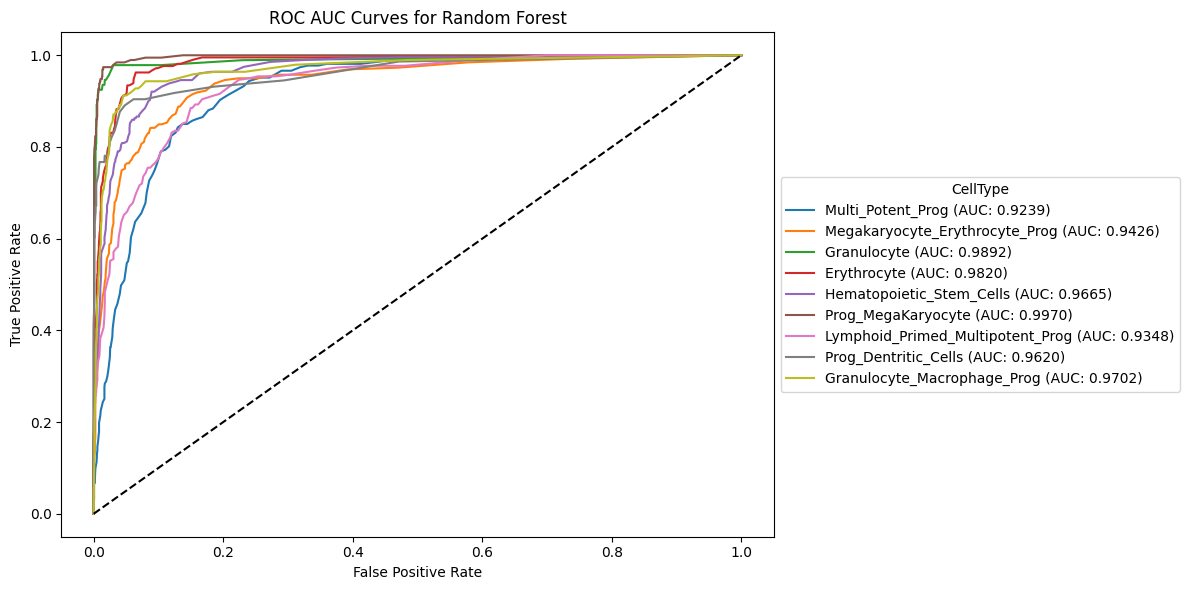

In [ ]:
# Step 1: Get predicted probabilities
predicted_probabilities = forest.predict_proba(X_test)  # shape (n_samples, n_classes)

# If Y_test is pandas Series, convert to numpy
true_classes = Y_test.to_numpy()


# Step 2: Compute overall multi-class ROC AUC
auc_score = roc_auc_score(true_classes, predicted_probabilities, multi_class='ovr')
print("Overall ROC AUC score:", auc_score)

# Step 3: Plot ROC curves for each class
labels = list(CellType_mapper.keys())

plt.figure(figsize=(12, 6))

for i in range(predicted_probabilities.shape[1]):
    # Compute ROC curve for class i
    fpr, tpr, _ = roc_curve(true_classes == i, predicted_probabilities[:, i])
    # Compute AUC for class i
    auc = roc_auc_score(true_classes == i, predicted_probabilities[:, i])
    plt.plot(fpr, tpr, label=f"{labels[i]} (AUC: {auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curves for Random Forest")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, ncol=1, title="CellType")
plt.tight_layout()
plt.show()

In [ ]:
# Super Tree
from supertree import SuperTree

# SuperTree Plot
super_tree = SuperTree(forest.estimators_[1], X_train, Y_train, X.columns.tolist(), list(map(str, Y.unique())))
super_tree.show_tree()

Output hidden; open in https://colab.research.google.com to view.

## Part IV: Hierarchical Clustering

In [ ]:
# Libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

### Divisive - Linkage

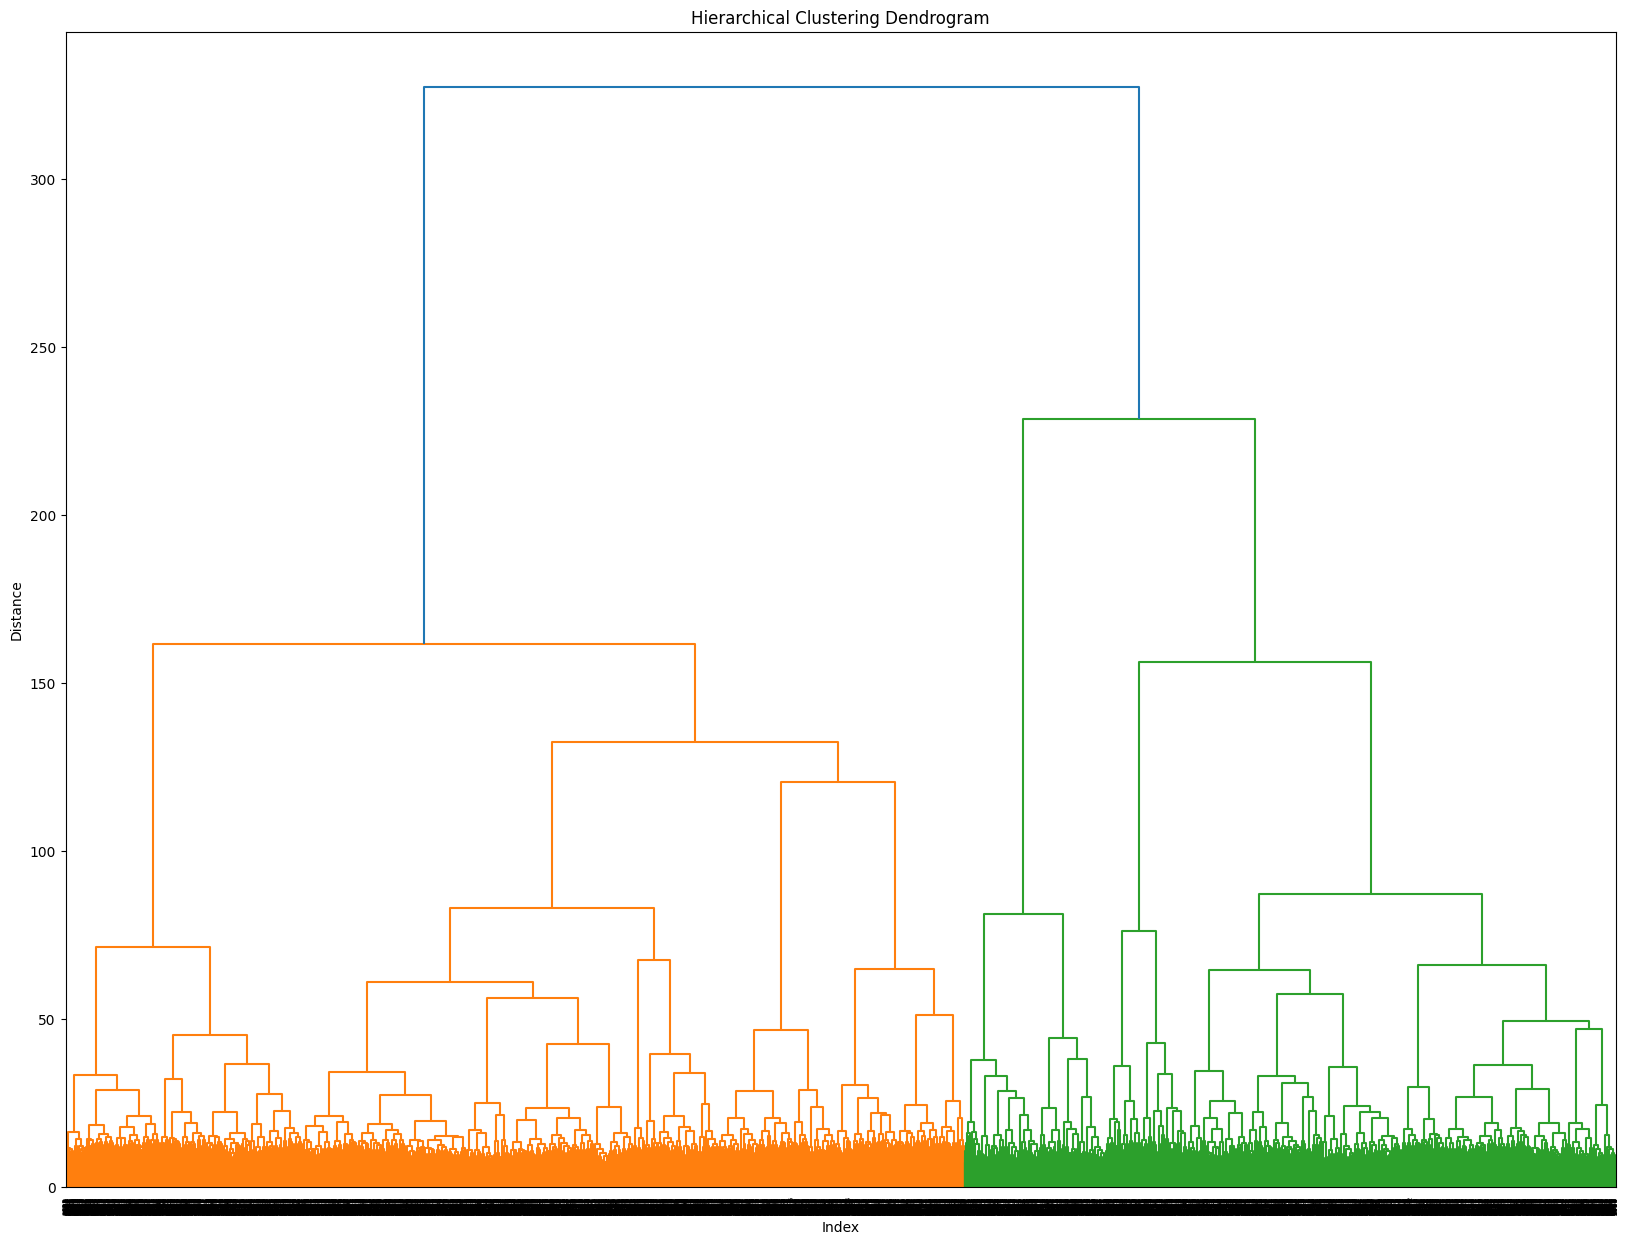

In [ ]:
# Model
Z = linkage(X, method='ward', metric="euclidean")

# Graficar el dendrograma
plt.figure(figsize=(20, 15))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

### Agglomerative

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
n_clusters = len(set(Y_train))
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,  linkage='ward')
labels = agg_clustering.fit_predict(X)

In [ ]:
# Create a DataFrame for better visualization
agglome_clust_df = pd.DataFrame({'Predicted': labels, 'CellType': Dataset_CellType_Labels})

# Create a cross-tabulation
contingency_table = pd.crosstab(agglome_clust_df['Predicted'], agglome_clust_df['CellType'])
contingency_table

CellType   Erythrocyte  Granulocyte  Granulocyte_Macrophage_Prog  \
Predicted                                                          
0                    1            2                            2   
1                    4          398                            4   
2                    1            0                            9   
3                    1            0                           18   
4                    1            4                          180   
5                  851            7                           13   
6                    8            1                          578   
7                  193           51                           27   
8                    3            2                          137   

CellType   Hematopoietic_Stem_Cells  Lymphoid_Primed_Multipotent_Prog  \
Predicted                                                               
0                                 1                                 1   
1                                 2                                37   
2                                22                                78   
3                               893                                83   
4                                54                               373   
5                                 1                                 3   
6                                 3                                71   
7                                22                                39   
8                               388                               620   

CellType   Megakaryocyte_Erythrocyte_Prog  Multi_Potent_Prog  \
Predicted                                                      
0                                      29                  1   
1                                      26                  4   
2                                       2                131   
3                                      15                353   
4                                      56                 94   
5                                     284                  1   
6                                      16                  3   
7                                     827                 20   
8                                      40                727   

CellType   Prog_Dentritic_Cells  Prog_MegaKaryocyte  
Predicted                                            
0                             3                 791  
1                             1                   0  
2                           257                   0  
3                            36                   1  
4                             4                   0  
5                             0                 102  
6                             9                   0  
7                            20                  72  
8                            34                   0

In [ ]:
contingency_table.idxmax(axis=0)

CellType
Erythrocyte                         5
Granulocyte                         1
Granulocyte_Macrophage_Prog         6
Hematopoietic_Stem_Cells            3
Lymphoid_Primed_Multipotent_Prog    8
Megakaryocyte_Erythrocyte_Prog      7
Multi_Potent_Prog                   8
Prog_Dentritic_Cells                2
Prog_MegaKaryocyte                  0
dtype: int64

## Part V: Gradient Boosting Tree

In [ ]:
# Libraries
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
# Model
gbc = GradientBoostingClassifier(n_estimators=10)

# Fit
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=10)

In [ ]:
# Predict
Y_pred = gbc.predict(X_test)

# Report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61       267
           1       0.67      0.71      0.69       259
           2       0.90      0.86      0.88        93
           3       0.81      0.79      0.80       213
           4       0.73      0.75      0.74       277
           5       0.93      0.90      0.91       193
           6       0.61      0.60      0.61       261
           7       0.87      0.64      0.74        73
           8       0.80      0.73      0.77       194

    accuracy                           0.73      1830
   macro avg       0.77      0.74      0.75      1830
weighted avg       0.73      0.73      0.73      1830



Overall ROC AUC score: 0.9583649367441122


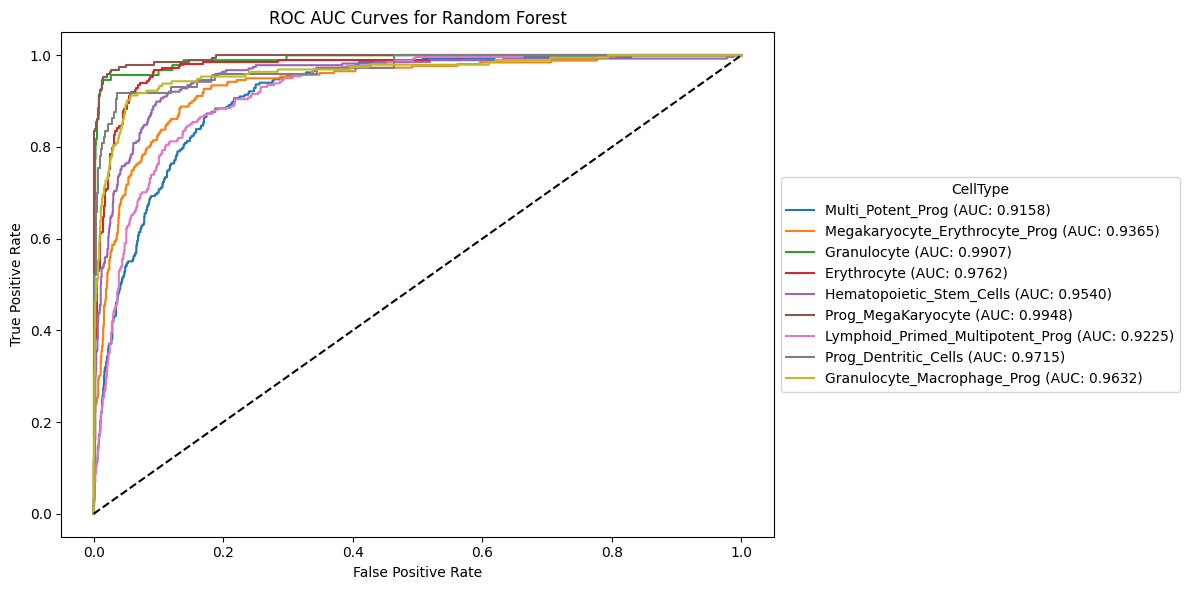

In [ ]:
# Step 1: Get predicted probabilities
predicted_probabilities = gbc.predict_proba(X_test)  # shape (n_samples, n_classes)

# If Y_test is pandas Series, convert to numpy
true_classes = Y_test.to_numpy()

# Step 2: Compute overall multi-class ROC AUC
auc_score = roc_auc_score(true_classes, predicted_probabilities, multi_class='ovr')
print("Overall ROC AUC score:", auc_score)

# Step 3: Plot ROC curves for each class
labels = list(CellType_mapper.keys())

plt.figure(figsize=(12, 6))

for i in range(predicted_probabilities.shape[1]):
    # Compute ROC curve for class i
    fpr, tpr, _ = roc_curve(true_classes == i, predicted_probabilities[:, i])
    # Compute AUC for class i
    auc = roc_auc_score(true_classes == i, predicted_probabilities[:, i])
    plt.plot(fpr, tpr, label=f"{labels[i]} (AUC: {auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curves for Random Forest")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, ncol=1, title="CellType")
plt.tight_layout()
plt.show()

In [ ]:
# Super Tree
from supertree import SuperTree

# SuperTree Plot
super_tree = SuperTree(gbc, X_train, Y_train, X.columns.tolist(), list(map(str, Y.unique())))
super_tree.show_tree()

Output hidden; open in https://colab.research.google.com to view.

## Part VI: Create Neural Network

In [ ]:
# Import required libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
# Select device to run in
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Create tensors
# X tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float).to(device)

# Y tensors
Y_train_tensor = torch.tensor(Y_train, dtype=torch.int64).to(device)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.int64).to(device)

<ipython-input-124-50269cc7a6f6>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_train_tensor = torch.tensor(Y_train, dtype=torch.int64).to(device)
<ipython-input-124-50269cc7a6f6>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_test_tensor = torch.tensor(Y_test, dtype=torch.int64).to(device)


In [ ]:
# Simple Classifier Class
class SimpleClassifier(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.layer_1 = nn.Linear(in_features, 128)
        self.layer_2 = nn.Linear(128, 256)
        self.layer_3 = nn.Linear(256, 128)
        self.layer_4 = nn.Linear(128, 64)
        self.layer_5 = nn.Linear(64, 32)
        self.layer_6 = nn.Linear(32, 16)
        self.layer_7 = nn.Linear(16, out_features)

    def forward(self, x):
        x = self.layer_7(self.layer_6(self.layer_5(self.layer_4(self.layer_3(self.layer_2(self.layer_1(x)))))))
        return x

In [ ]:
# Define features and classes
in_features = X_train.shape[1]
num_classes = len(set(Y_train))

# Create classifier model object
model = SimpleClassifier(in_features, num_classes).to(device)

In [ ]:
# Optimization criteria
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor)

    _, predicted_labels = torch.max(outputs, 1)
    correct_predictions = (predicted_labels == Y_train_tensor).sum().item()

    total_samples = Y_train_tensor.size(0)
    accuracy = correct_predictions / total_samples

    # Accuracy
    #accuracy = accuracy_score(Y_train_tensor.cpu().numpy(), predicted_labels.cpu().numpy())

    # BackPropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")

Epoch [100/1000], Loss: 0.4846, Accuracy: 0.8126
Epoch [200/1000], Loss: 0.4030, Accuracy: 0.8432
Epoch [300/1000], Loss: 0.3961, Accuracy: 0.8432
Epoch [400/1000], Loss: 0.3899, Accuracy: 0.8455
Epoch [500/1000], Loss: 0.3890, Accuracy: 0.8458
Epoch [600/1000], Loss: 0.3887, Accuracy: 0.8464
Epoch [700/1000], Loss: 0.3970, Accuracy: 0.8435
Epoch [800/1000], Loss: 0.3905, Accuracy: 0.8465
Epoch [900/1000], Loss: 0.3895, Accuracy: 0.8462
Epoch [1000/1000], Loss: 0.3888, Accuracy: 0.8472


In [ ]:
# Import Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Model Evaluation
model.eval()
with torch.inference_mode():
    outputs = model(X_test_tensor)
    probabilities = F.softmax(outputs, dim=1)
    _, predicted_labels = torch.max(outputs, 1)

    accuracy = accuracy_score(Y_test, predicted_labels.numpy())
    f1 = f1_score(Y_test, predicted_labels.numpy(), average='weighted')
    precision = precision_score(Y_test, predicted_labels.numpy(), average='weighted')
    recall = recall_score(Y_test, predicted_labels.numpy(), average='weighted')
    predicted_tensor = predicted_labels.clone().detach()
    loss = criterion(outputs, predicted_tensor)

    print(f"Test Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

Test Loss: 0.1890, Accuracy: 0.7454, Precision: 0.7487, Recall: 0.7454, F1-score: 0.7458


In [ ]:
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score, roc_curve, auc

ROC AUC scores: 0.9560382731722081


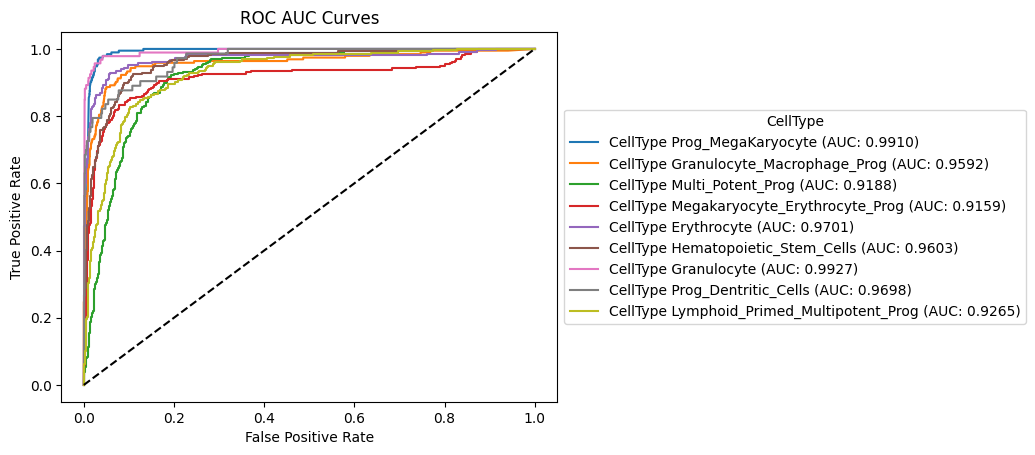

In [ ]:
true_classes = Y_test.to_numpy()  # Convert to numpy array
predicted_probabilities = probabilities.numpy()  # Convert to numpy array

auc_scores = roc_auc_score(true_classes, predicted_probabilities, multi_class='ovr')
print("ROC AUC scores:", auc_scores)

labels = list(CellType_mapper.keys())

# Plot ROC AUC curves for each class
for i in range(predicted_probabilities.shape[1]):
    fpr, tpr, _ = roc_curve(true_classes == i, predicted_probabilities[:, i])
    auc = roc_auc_score(Y_test == i, predicted_probabilities[:, i])
    plt.plot(fpr, tpr, label=f"CellType {labels[i]} (AUC: {auc:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curves")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, ncol=1, title="CellType")
plt.show()

In [ ]:
# Report
from sklearn.metrics import classification_report

print(classification_report(Y_test, predicted_labels.numpy()))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       193
           1       0.79      0.74      0.76       194
           2       0.59      0.63      0.61       267
           3       0.77      0.72      0.74       259
           4       0.85      0.83      0.84       213
           5       0.80      0.72      0.76       277
           6       0.77      0.92      0.84        93
           7       0.73      0.73      0.73        73
           8       0.65      0.68      0.66       261

    accuracy                           0.75      1830
   macro avg       0.75      0.76      0.76      1830
weighted avg       0.75      0.75      0.75      1830

